In [40]:
import pandas as pd


In [41]:
file_path = 'pkl/Hospital_reviews_positive.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  positive_model = pickle.load(pickle_file)

file_path = 'pkl/Hospital_reviews_vectorize.pkl'
with open(file_path, 'rb') as pickle_file:
  vectorize_model = pickle.load(pickle_file)


In [42]:
df_hr = pd.read_csv('./csv/Seleniums_kakao_hospital_reviews_modified.csv')

In [43]:
df_hr_extract = df_hr[['hospital_name', 'text']].dropna()

In [44]:
from mecab import MeCab
mecab = MeCab()
def extract(sentence) :
    # morphs_nouns_list = []
    # for sentence in series:
    morphs_nouns = ''
    for morph, tag in mecab.pos(sentence) : 
        if tag in ['NNG', 'NNP', 'NNB', 'NNBC', 'NP', 'NR', 'VA', 'MAG', 'SY', 'VV+EC'] :
            morphs_nouns += (morph+' ')            
    # morphs_nouns_list.append(morphs_nouns)
        pass
    return morphs_nouns

In [45]:
# make predict function
def sample_predict(features):
    tokenized_features = vectorize_model.transform([extract(features)])
    return positive_model.predict(tokenized_features)[0]


In [46]:
import datetime
start_time = datetime.datetime.now()

df_hr_extract['text_predict'] = df_hr_extract['text'].apply(sample_predict)

end_time = datetime.datetime.now()
print(f"실행 시간: {end_time - start_time}")

실행 시간: 0:01:44.937466


In [47]:
hospital_name_list = df_hr['hospital_name'].unique().tolist()
hospital_name_list

['고려대학교 구로병원',
 '소중한메디케어',
 '참튼튼병원 구로점 신관',
 '구로예스병원',
 '명지성모병원',
 '엠케이비뇨기과의원',
 '대한산업보건협회부설 서울의원',
 '하나정형외과의원',
 '상쾌한이비인후과',
 '서울연세안과의원',
 '연세내과의원',
 '구로나르샤정형외과',
 '삼성밝은안과의원',
 '마음과마음 정신과의원',
 '미래사랑산부인과의원',
 '세진내과의원',
 '정내과의원',
 '강충희치과의원',
 '나비에스의원',
 '아름샘의원',
 '구로밝은빛안과',
 '최창영이비인후과의원',
 '아비쥬의원 구로',
 'e서울이비인후과',
 '365서울한의원',
 '코리아정형외과의원',
 '참튼튼병원 구로점 본관',
 '다나이비인후과의원',
 '서울삼성내과',
 '포인트의원',
 '구로연세의원',
 '구로튼튼의원',
 '사랑의피부과의원',
 '더케이내과의원',
 '마음속내과의원 구로점',
 '좋은아침한의원 구로디지털점',
 '이덕기내과의원 피부클리닉 통증클리닉',
 '가산본튼튼의원',
 '진가정의학과의원',
 '고려대학교구로병원 치과센터',
 '강남삼성신경외과의원 구로점',
 '서울내과의원',
 '서울아가온여성의원',
 '이레소아청소년과의원',
 '연세오치과의원',
 '구로삼성탑정형외과의원',
 '가산디지털내과의원',
 '홀인원의원',
 '서울에이스치과의원',
 '연세안과의원',
 '곽승민의원',
 '광덕안정한의원 구로디지털점',
 '서울웃는얼굴치과의원',
 '서울구로디지털내과의원',
 '고려대학교구로병원 응급의료센터',
 '뉴욕비엔에스치과의원',
 '88흉부외과의원',
 '이랜드의원',
 '제일성모내과의원',
 '삼성편한내과의원',
 '청담맥의원 구로점',
 '대림성모병원',
 '서울삼성내과의원',
 '경희배흘림한의원',
 '연세남구로치과의원',
 '삼성바른내과의원',
 '가산안과의원',
 '눈에힘안과',
 '남서울요양병원',
 '하늘마음한의원 금천점',
 '이지신경외과의원',
 '영등포봄한방병원',
 '구로에이스정형외과의원',
 '김성목내

In [48]:
df_hr_extract

hospital_name                                               text  \
0        고려대학교 구로병원                                     불친절!! 전공의 복귀해!   
1        고려대학교 구로병원  Very crowded and the doctors can be very unfri...   
3        고려대학교 구로병원  여 기 진 짜 별로임\n애기 발에 고름이 꽉차서 누렇고 퉁퉁부어있는데\n발 보더니 ...   
5        고려대학교 구로병원  고대\n구로병원에 가시거든 다른 병원가세요\n저희 아버지 일반 병실에 계시다가\n중...   
6        고려대학교 구로병원  여기 서류 처리 때문에 전화 했었는데 늙은 사람이 전화 받는 태도 말투가 기본도 안...   
...             ...                                                ...   
3947  신도림 하나이비인후과의원  진짜 진짜 친절 이렇게 친절하신 의사선생님 첨봐용\n병원도 꽤 커요 2층도 있고 5...   
3948  신도림 하나이비인후과의원                                 원장님, 간호사님 모두 친절해요.   
3949  신도림 하나이비인후과의원                                       처음 가봤는데 친절해요   
3950  신도림 하나이비인후과의원  여기 간호사님들 너무 친절해요 ㅠ 저녁에 7시쯤에 갔는데 애들 환자도 진짜 많았거든...   
3951  신도림 하나이비인후과의원                                               최고예요   

      text_predict  
0              0.0  
1              2.0  
3              0.0  
5              0.0  
6              0.0  
...            ...  
3947           2.0  
3948           2.0  
3949           2.0  
3950           2.0  
3951           2.0  

[3842 rows x 3 columns]

In [49]:
def change_number(row) :
    if row==2 :
        row=1
    return row


In [50]:
for x in range(len(hospital_name_list)) :
    df_hr_extract['text_predict'] = df_hr_extract['text_predict'].apply(change_number)
    

In [51]:
df_hr_extract

hospital_name                                               text  \
0        고려대학교 구로병원                                     불친절!! 전공의 복귀해!   
1        고려대학교 구로병원  Very crowded and the doctors can be very unfri...   
3        고려대학교 구로병원  여 기 진 짜 별로임\n애기 발에 고름이 꽉차서 누렇고 퉁퉁부어있는데\n발 보더니 ...   
5        고려대학교 구로병원  고대\n구로병원에 가시거든 다른 병원가세요\n저희 아버지 일반 병실에 계시다가\n중...   
6        고려대학교 구로병원  여기 서류 처리 때문에 전화 했었는데 늙은 사람이 전화 받는 태도 말투가 기본도 안...   
...             ...                                                ...   
3947  신도림 하나이비인후과의원  진짜 진짜 친절 이렇게 친절하신 의사선생님 첨봐용\n병원도 꽤 커요 2층도 있고 5...   
3948  신도림 하나이비인후과의원                                 원장님, 간호사님 모두 친절해요.   
3949  신도림 하나이비인후과의원                                       처음 가봤는데 친절해요   
3950  신도림 하나이비인후과의원  여기 간호사님들 너무 친절해요 ㅠ 저녁에 7시쯤에 갔는데 애들 환자도 진짜 많았거든...   
3951  신도림 하나이비인후과의원                                               최고예요   

      text_predict  
0              0.0  
1              1.0  
3              0.0  
5              0.0  
6              0.0  
...            ...  
3947           1.0  
3948           1.0  
3949           1.0  
3950           1.0  
3951           1.0  

[3842 rows x 3 columns]

In [52]:
df_hr_extract.query(f"hospital_name=='{hospital_name_list[0]}'").query("text_predict==0").count()

hospital_name    133
text             133
text_predict     133
dtype: int64

In [53]:
nega_list = []
posi_list = []
all_list = []


In [54]:
df_hr_extract.query(f"hospital_name=='{hospital_name_list[0]}'")

hospital_name                                               text  \
0       고려대학교 구로병원                                     불친절!! 전공의 복귀해!   
1       고려대학교 구로병원  Very crowded and the doctors can be very unfri...   
3       고려대학교 구로병원  여 기 진 짜 별로임\n애기 발에 고름이 꽉차서 누렇고 퉁퉁부어있는데\n발 보더니 ...   
5       고려대학교 구로병원  고대\n구로병원에 가시거든 다른 병원가세요\n저희 아버지 일반 병실에 계시다가\n중...   
6       고려대학교 구로병원  여기 서류 처리 때문에 전화 했었는데 늙은 사람이 전화 받는 태도 말투가 기본도 안...   
...            ...                                                ...   
172     고려대학교 구로병원  알러지반응 심해서 갔는데 긴박한 응급실에서도 계속 여러사람이와서 물어봐주고 3시간만...   
174     고려대학교 구로병원                                  의료진도 괜찮고 대부분 친절함.   
1823    고려대학교 구로병원  마이나스는 없나요?\n할수없이 별한개준ㅠ\n여기가느니 차라리 동네돌팔이 한테 가면 ...   
1824    고려대학교 구로병원  1. 나이든 경력 많은 믿을만한 교수가 없음. 그래서 제대로된 처방 및 병명 알기가...   
1825    고려대학교 구로병원  최고긴개뿔\n수술날짜 예약후  교수학회일정?으로 취소전화옴\n다시예약잡아준대서  날...   

      text_predict  
0              0.0  
1              1.0  
3              0.0  
5              0.0  
6              0.0  
...            ...  
172            1.0  
174            1.0  
1823           0.0  
1824           0.0  
1825           0.0  

[155 rows x 3 columns]

In [55]:
df_hr_extract.query(f"hospital_name=='{hospital_name_list[x]}' and text_predict==0").count()

hospital_name    23
text             23
text_predict     23
dtype: int64

In [56]:
mean_list = []
nega_list = []
posi_list = []
all_list = []
for x in range(len(hospital_name_list)) :
    mean_list.append(round(df_hr_extract.query(f"hospital_name=='{hospital_name_list[x]}'")['text_predict'].mean(),2))
    nega_list.append(df_hr_extract.query(f"hospital_name=='{hospital_name_list[x]}' and text_predict==0").count().loc['text'])
    posi_list.append(df_hr_extract.query(f"hospital_name=='{hospital_name_list[x]}' and text_predict==1").count().loc['text'])
    all_list.append(df_hr_extract.query(f"hospital_name=='{hospital_name_list[x]}' and text_predict==0").count().loc['text']+df_hr_extract.query(f"hospital_name=='{hospital_name_list[x]}' and text_predict==1").count().loc['text'])

In [57]:
nega_list

[133,
 35,
 5,
 13,
 26,
 2,
 14,
 0,
 12,
 37,
 2,
 5,
 1,
 8,
 2,
 8,
 3,
 3,
 0,
 2,
 2,
 6,
 51,
 22,
 0,
 1,
 49,
 17,
 3,
 2,
 1,
 4,
 9,
 2,
 5,
 2,
 2,
 14,
 0,
 5,
 1,
 10,
 7,
 3,
 0,
 4,
 28,
 10,
 1,
 0,
 1,
 5,
 0,
 4,
 13,
 2,
 0,
 6,
 3,
 20,
 3,
 29,
 1,
 4,
 1,
 3,
 10,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 16,
 9,
 1,
 7,
 6,
 0,
 13,
 1,
 16,
 0,
 23,
 0,
 2,
 0,
 1,
 6,
 0,
 0,
 1,
 0,
 7,
 3,
 0,
 12,
 1,
 0,
 1,
 3,
 1,
 0,
 2,
 0,
 2,
 0,
 8,
 0,
 3,
 0,
 4,
 0,
 6,
 20,
 0,
 67,
 10,
 3,
 2,
 0,
 1,
 1,
 1,
 18,
 8,
 0,
 0,
 0,
 4,
 0,
 0,
 3,
 0,
 1,
 6,
 2,
 0,
 2,
 0,
 0,
 9,
 7,
 0,
 2,
 0,
 2,
 0,
 8,
 15,
 1,
 1,
 4,
 3,
 0,
 8,
 2,
 0,
 0,
 1,
 11,
 30,
 1,
 10,
 2,
 0,
 12,
 0,
 0,
 2,
 0,
 7,
 0,
 1,
 3,
 0,
 0,
 2,
 3,
 7,
 9,
 0,
 0,
 0,
 0,
 0,
 5,
 8,
 1,
 0,
 0,
 1,
 1,
 10,
 3,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 6,
 3,
 1,
 1,
 1,
 0,
 19,
 0,
 0,
 4,
 0,
 7,
 0,
 0,
 0,
 0,
 1,
 2,
 5,
 0,
 0,
 1,
 0,
 2,
 8,


In [68]:
df_hpp = pd.DataFrame(
    data = list(zip(hospital_name_list, mean_list, nega_list, posi_list, all_list)),
    columns=['hospital_name', 'percent', 'negative', 'positive', 'all']
)

In [69]:
df_hpp

hospital_name  percent  negative  positive  all
0       고려대학교 구로병원     0.14       133        22  155
1          소중한메디케어     0.33        35        17   52
2     참튼튼병원 구로점 신관     0.69         5        11   16
3           구로예스병원     0.32        13         6   19
4           명지성모병원     0.16        26         5   31
..             ...      ...       ...       ...  ...
267        장연복내과의원     0.38         5         3    8
268          백구한의원     1.00         0         3    3
269         덕인내과의원     1.00         0         1    1
270         소망치과의원     0.67         1         2    3
271  신도림 하나이비인후과의원     0.60        23        34   57

[272 rows x 5 columns]

In [70]:
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

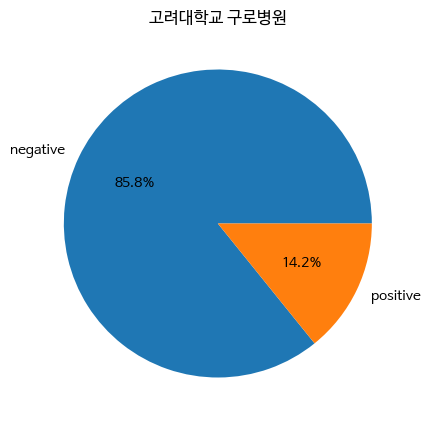

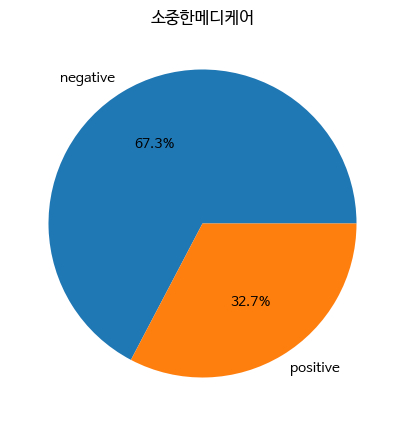

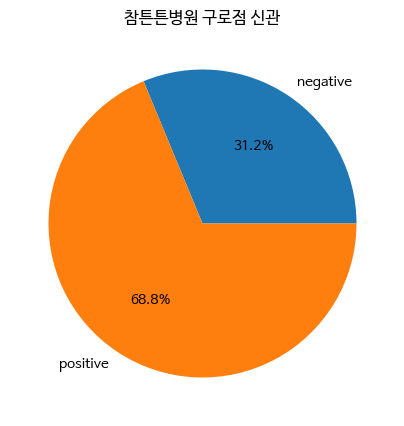

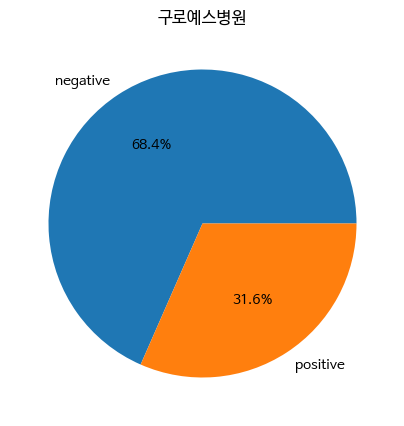

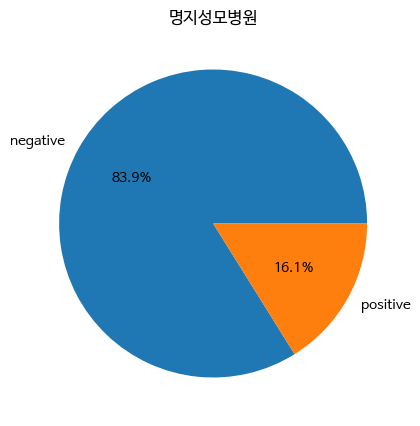

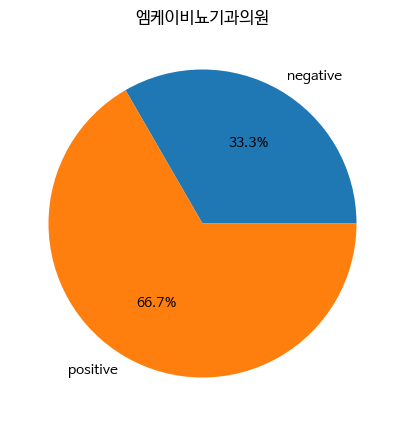

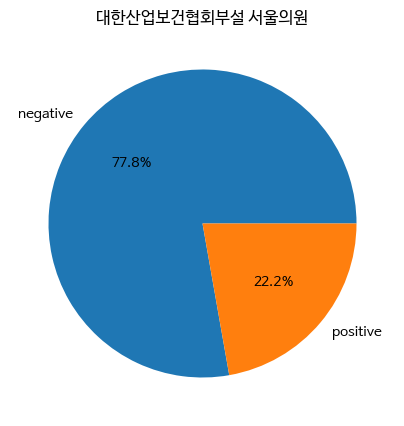

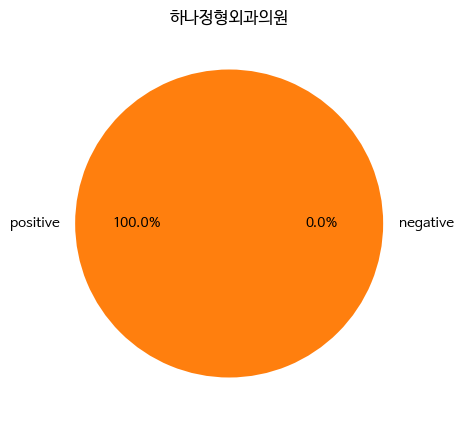

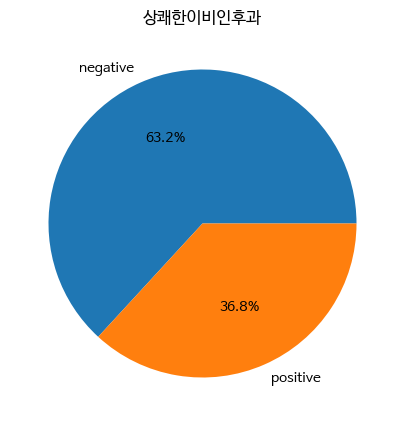

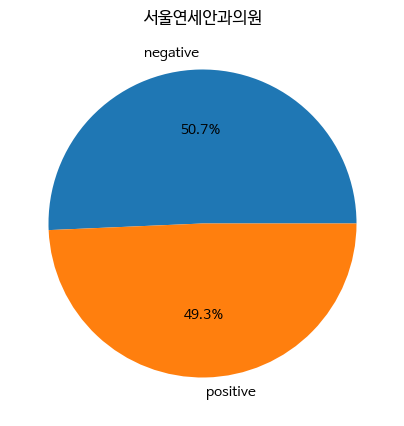

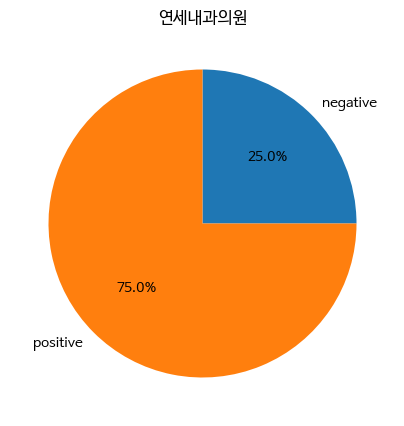

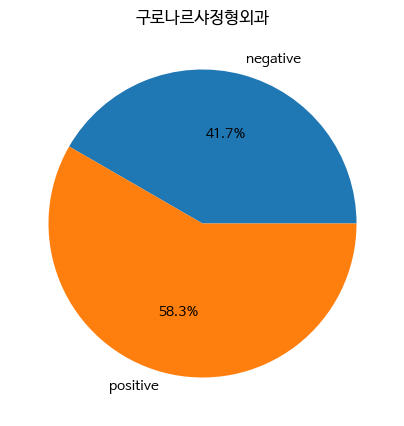

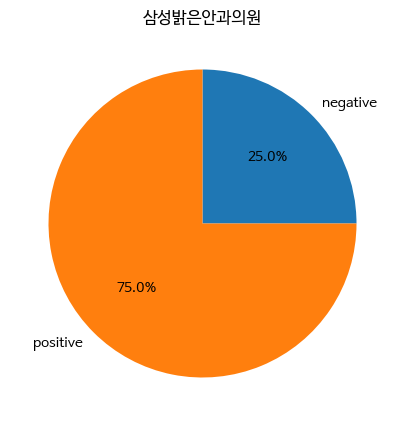

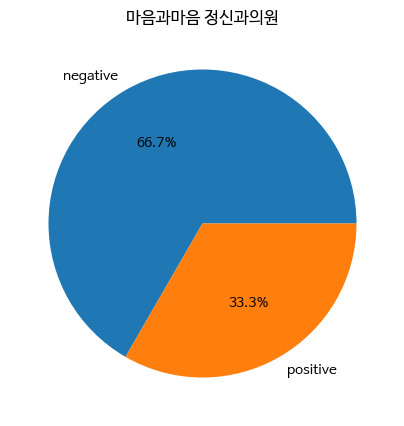

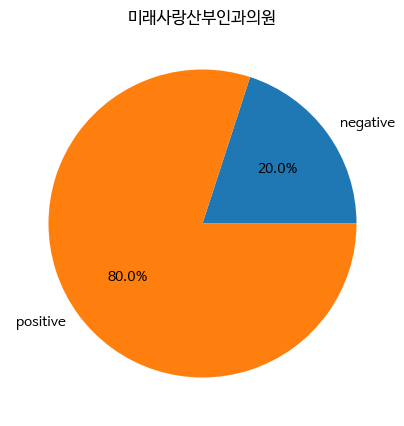

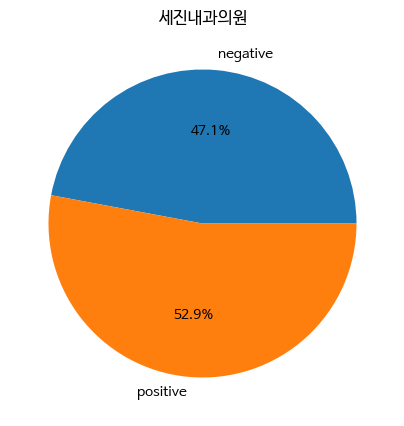

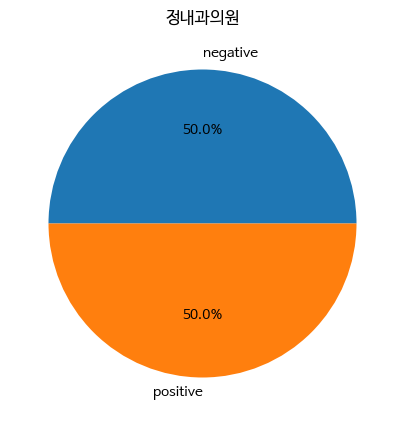

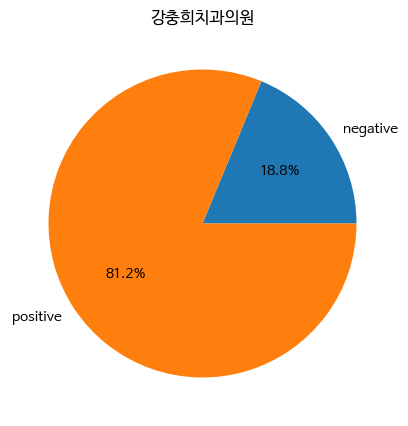

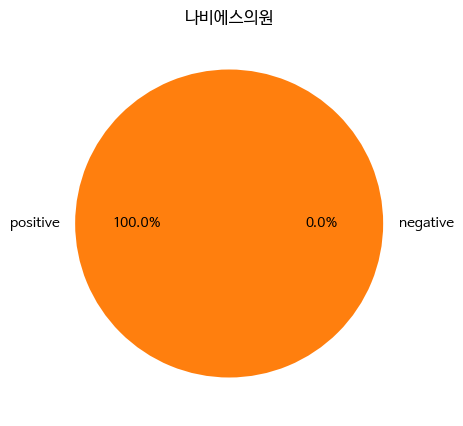

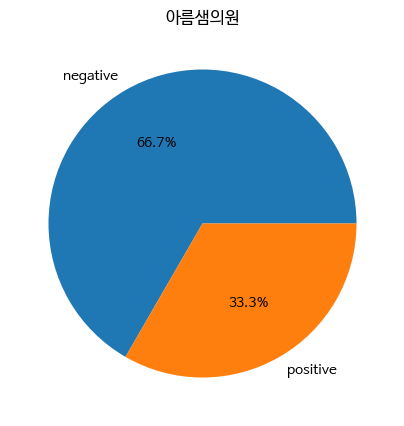

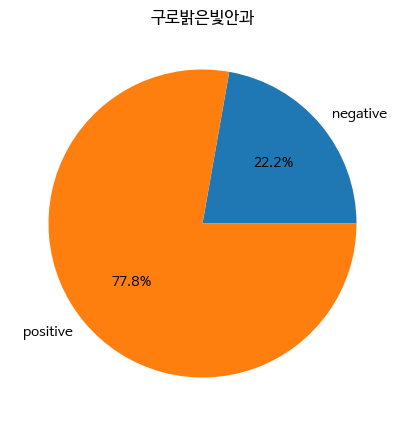

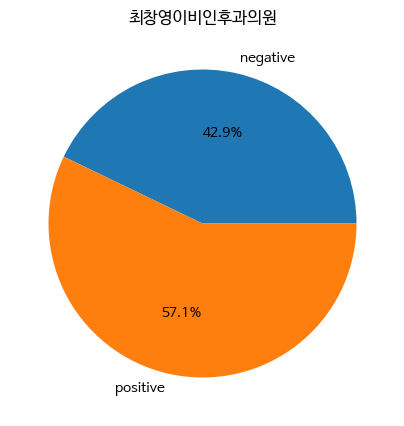

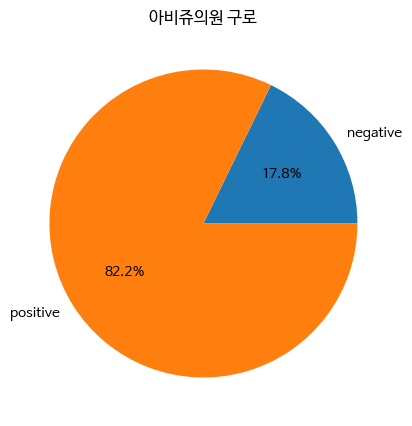

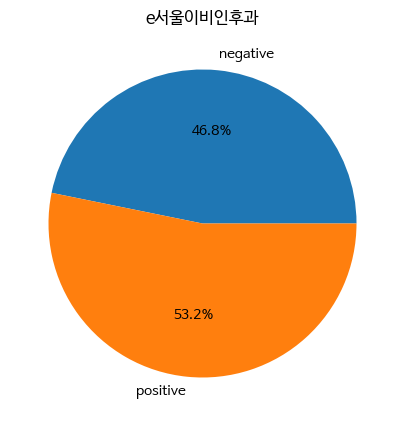

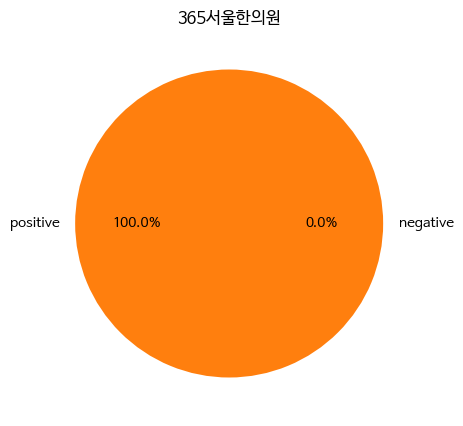

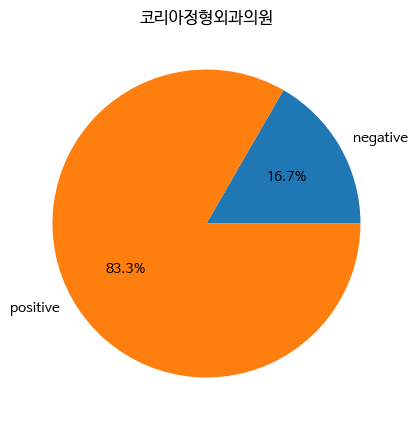

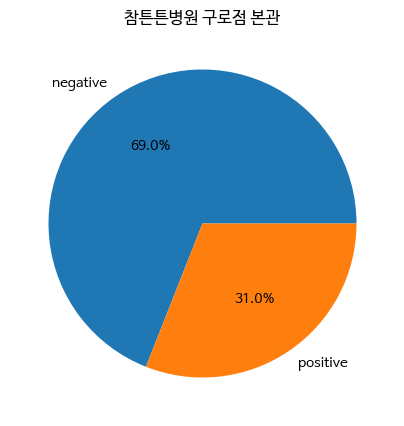

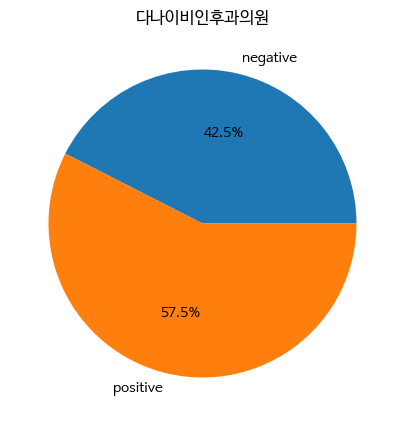

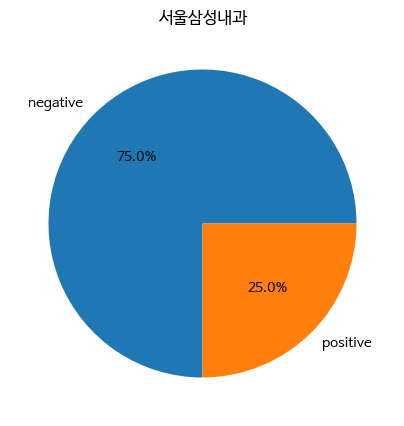

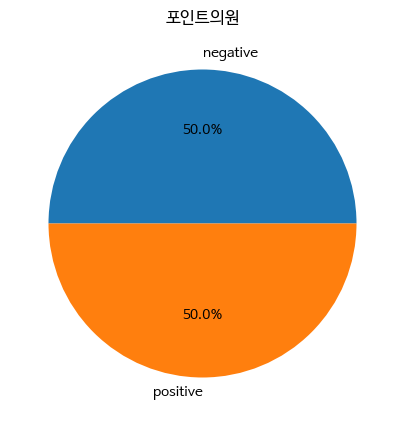

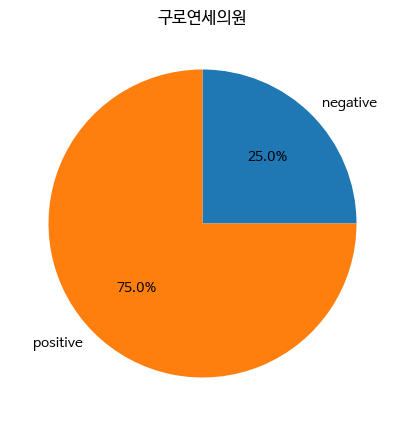

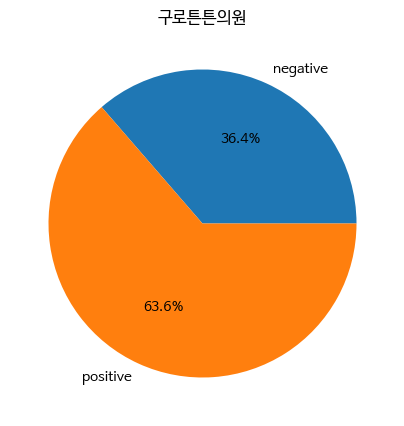

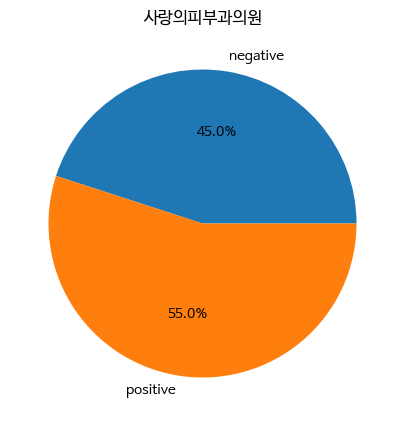

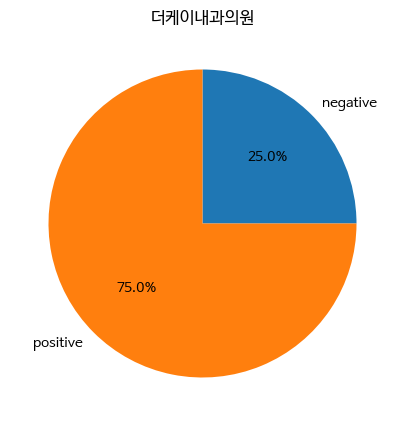

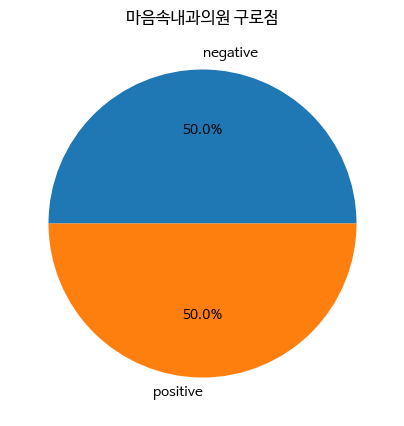

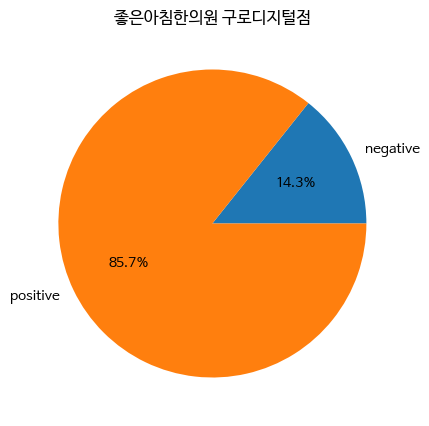

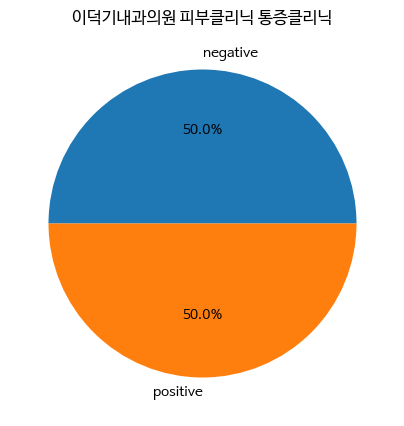

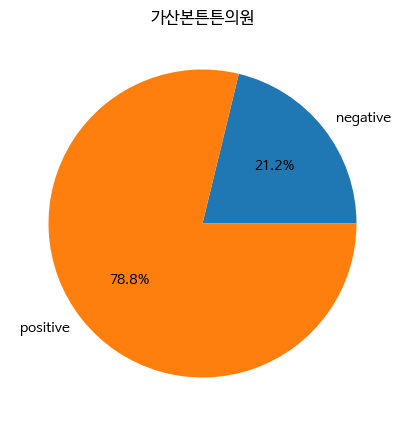

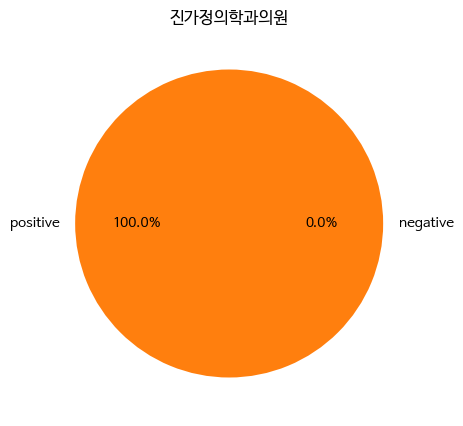

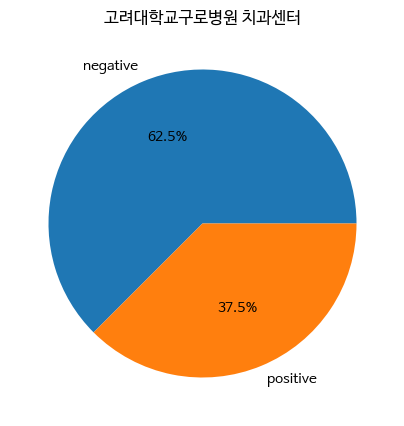

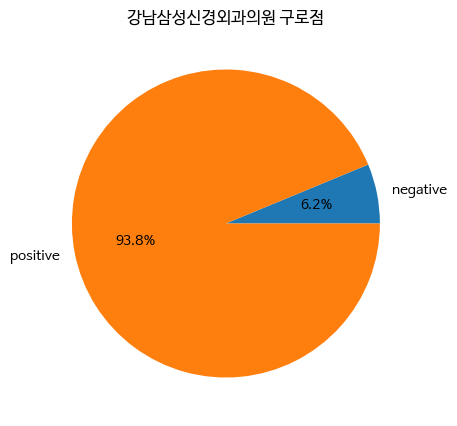

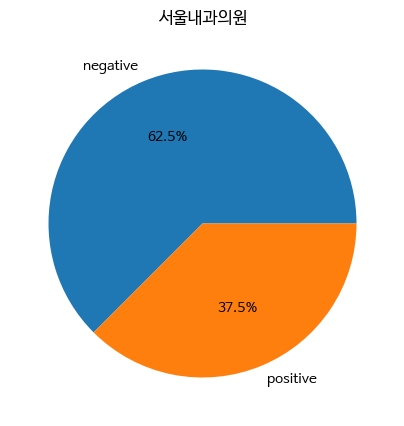

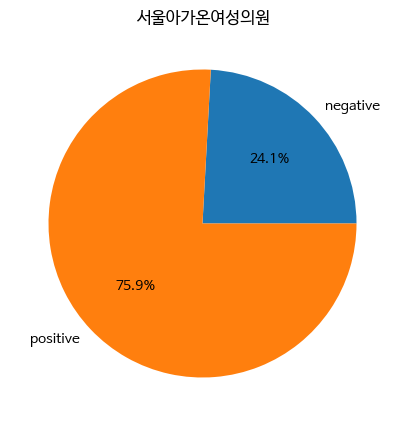

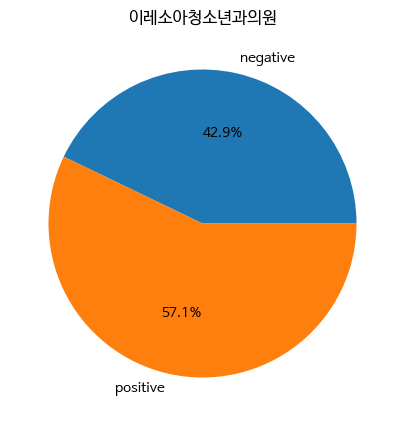

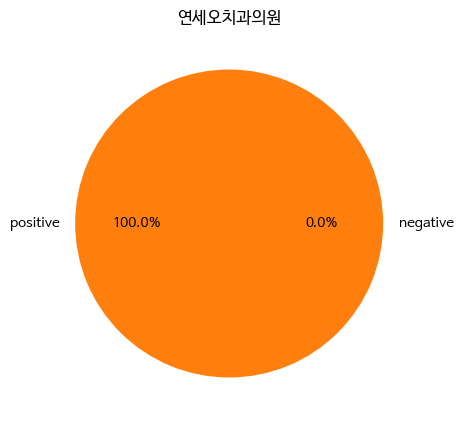

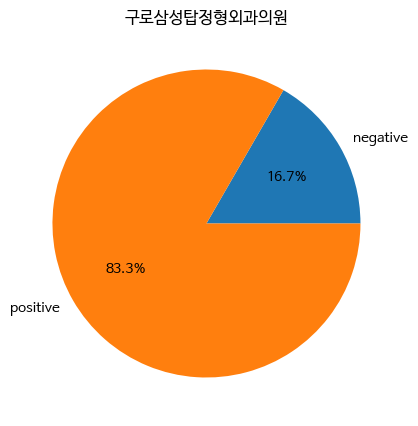

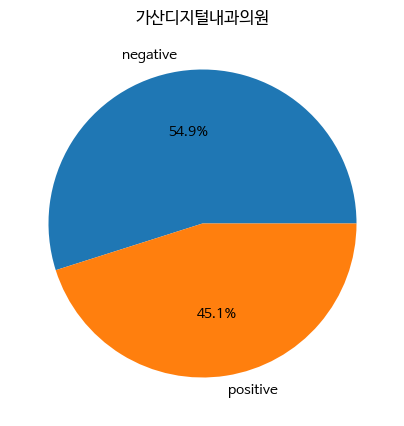

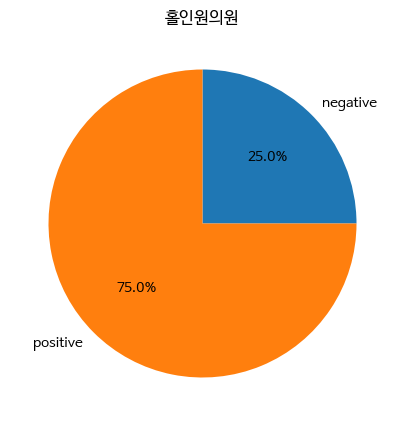

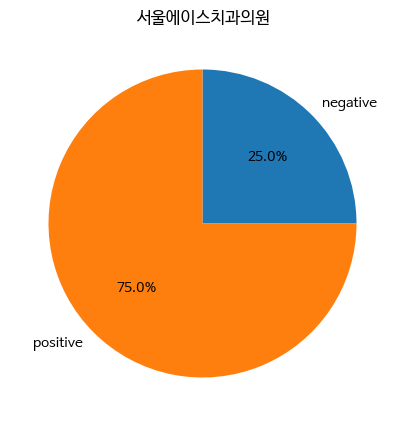

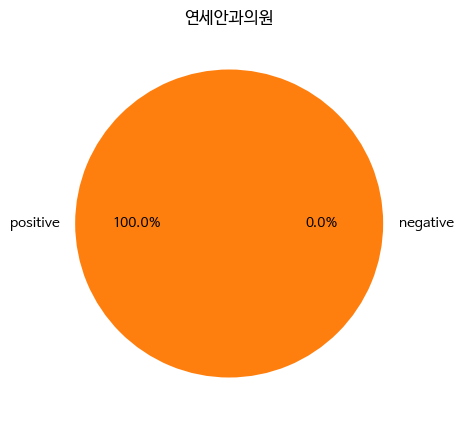

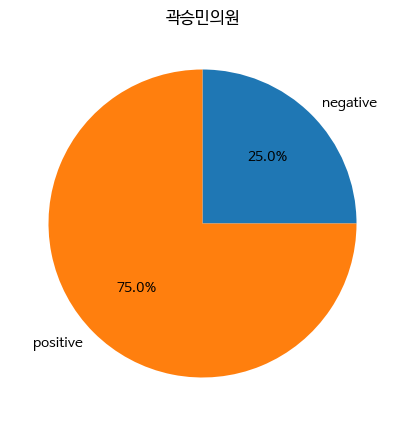

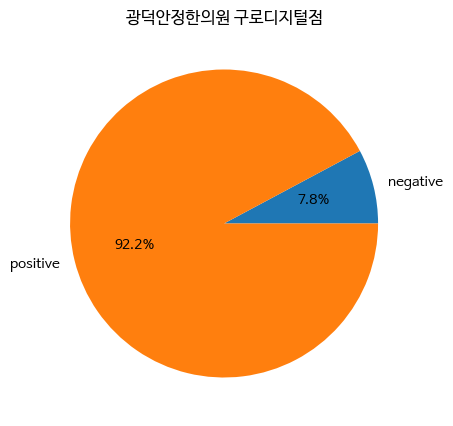

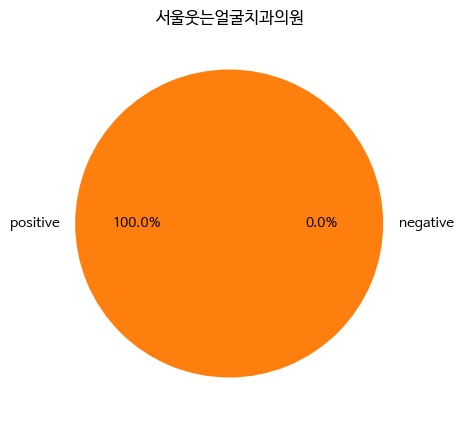

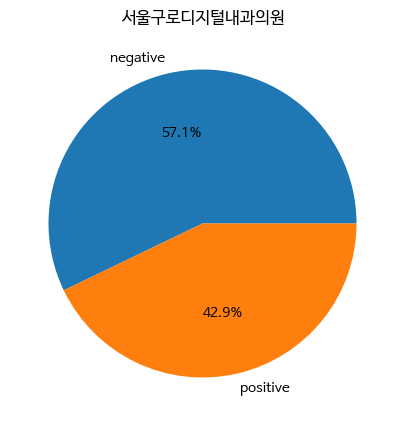

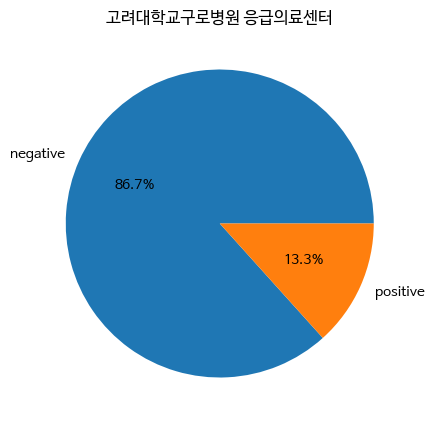

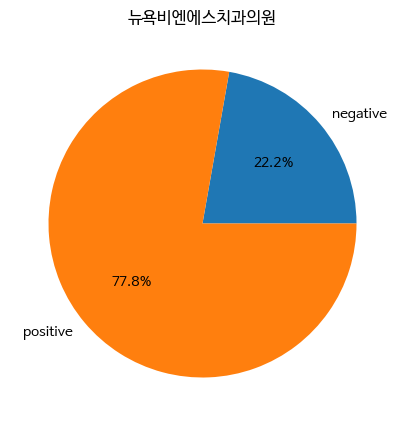

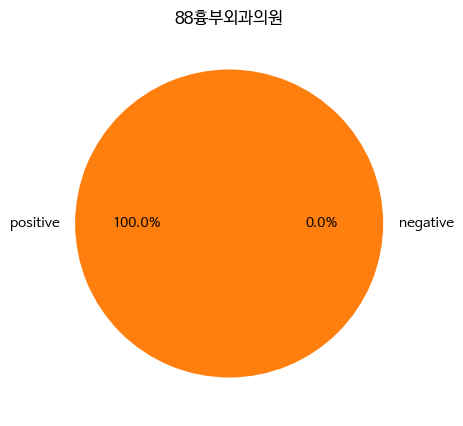

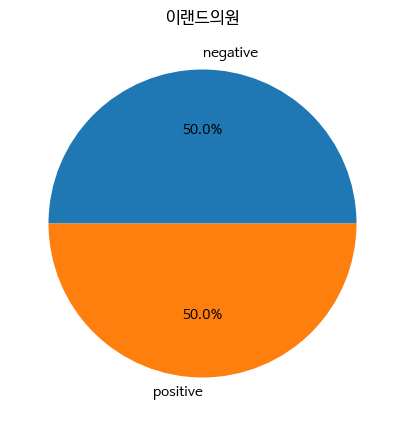

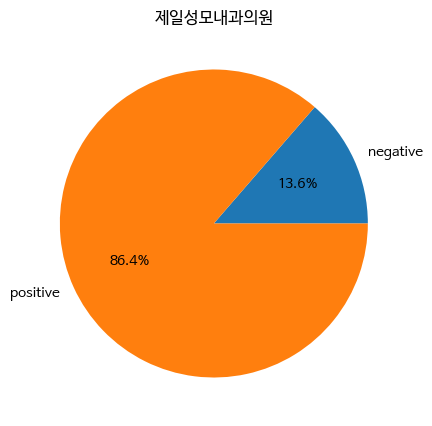

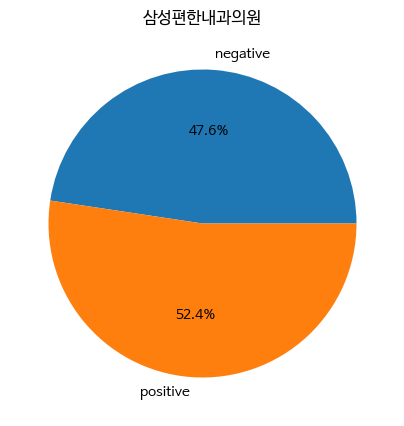

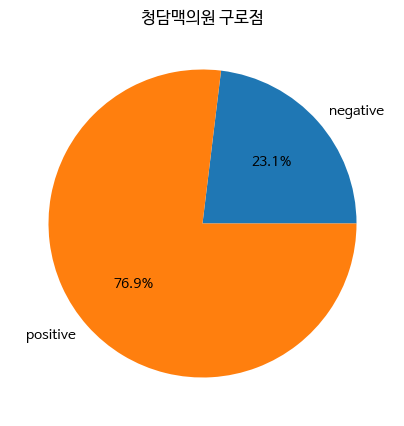

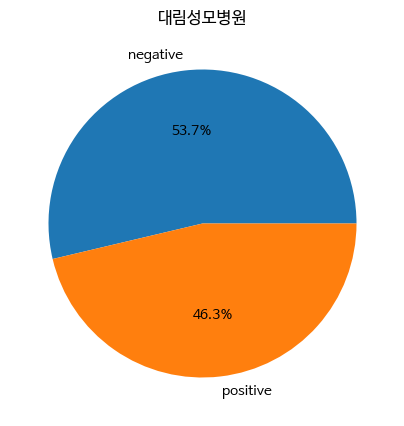

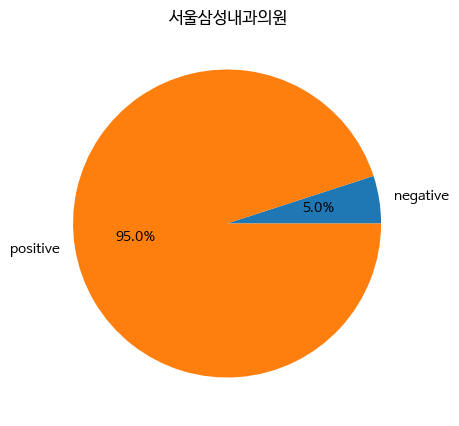

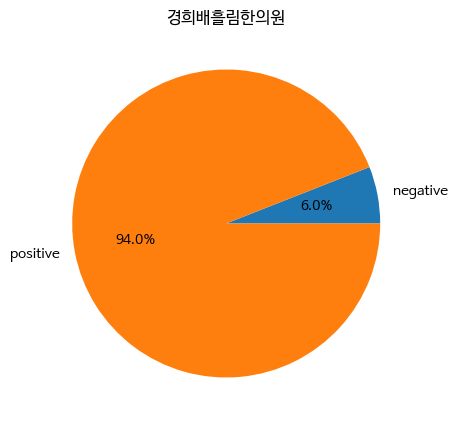

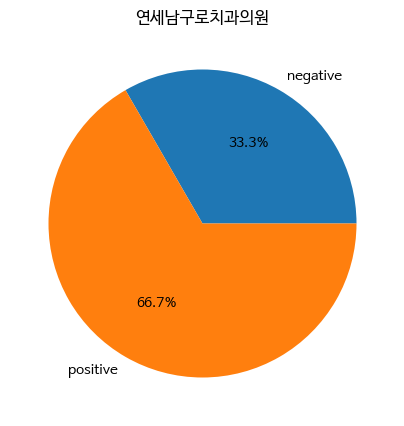

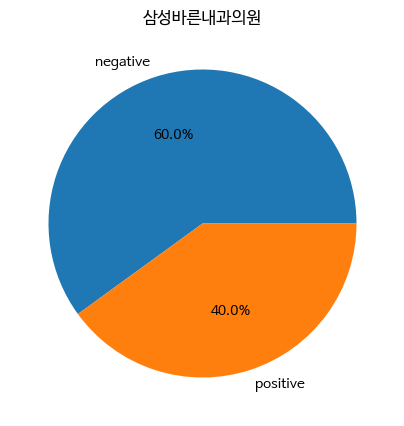

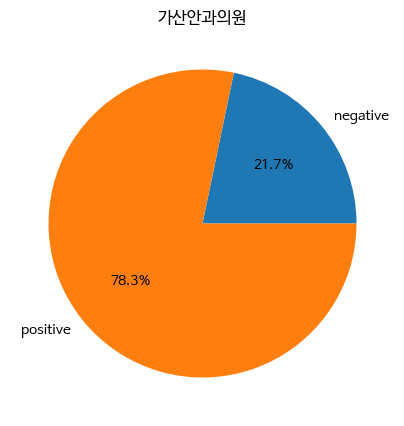

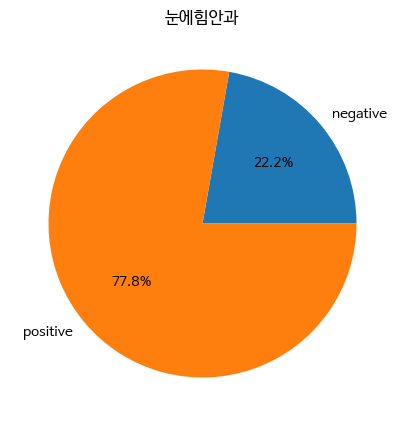

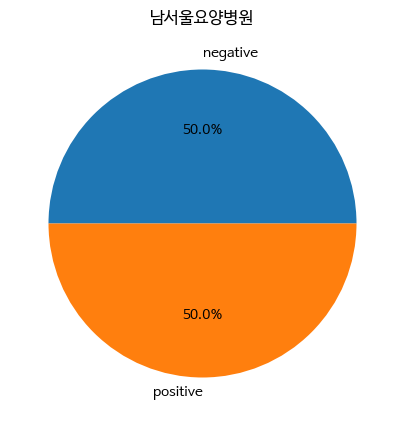

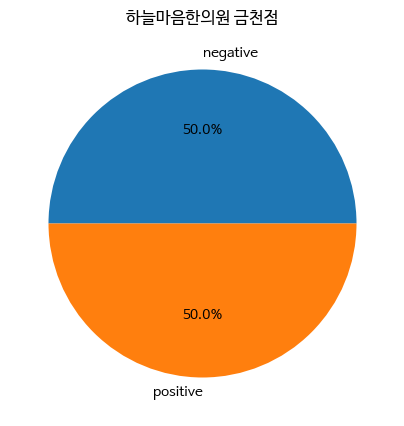

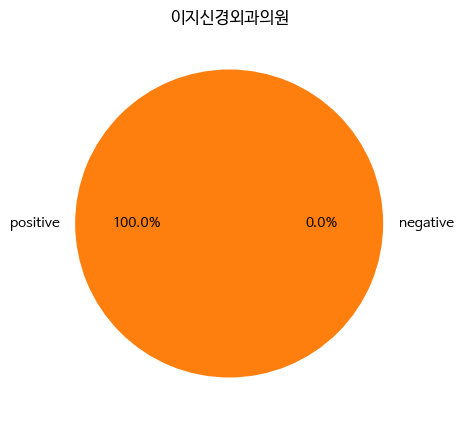

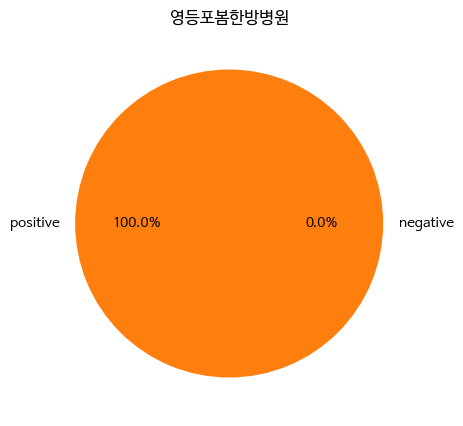

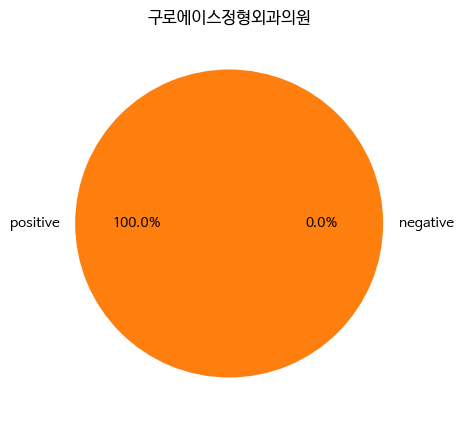

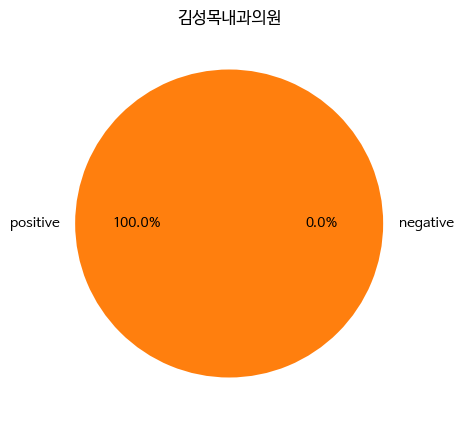

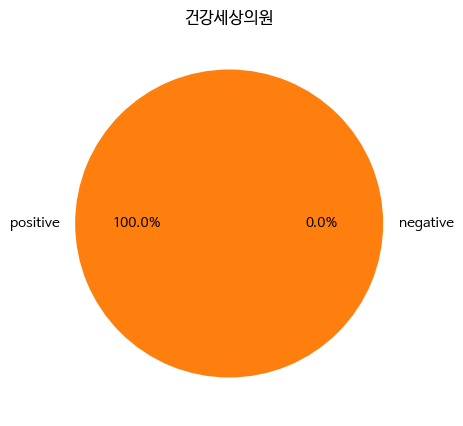

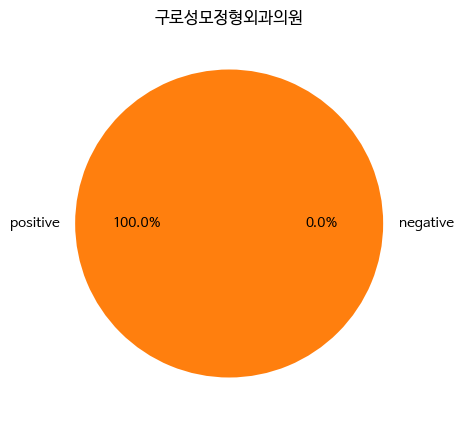

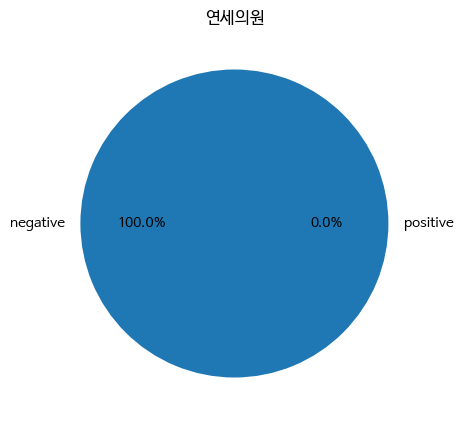

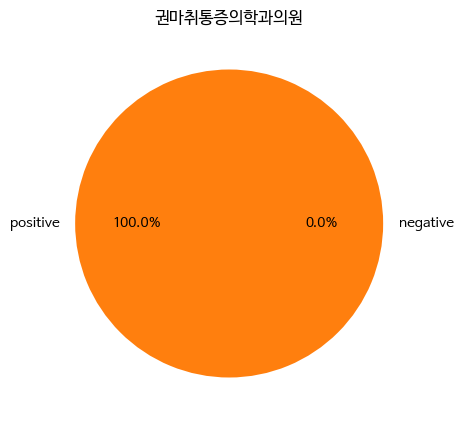

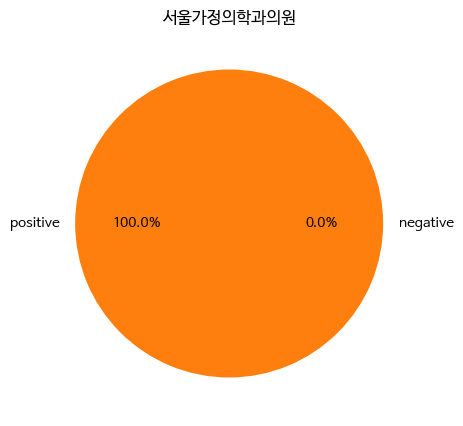

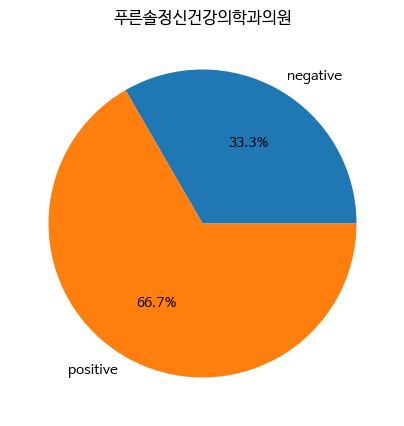

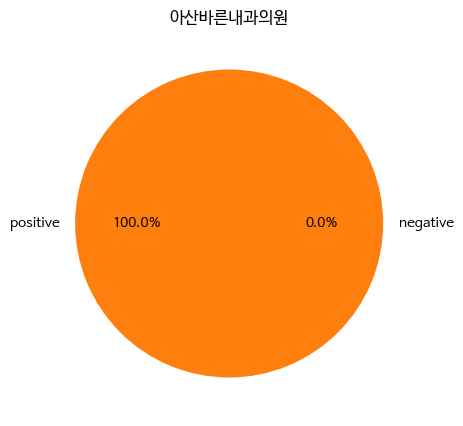

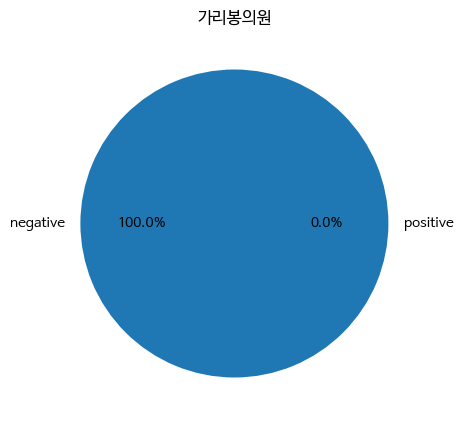

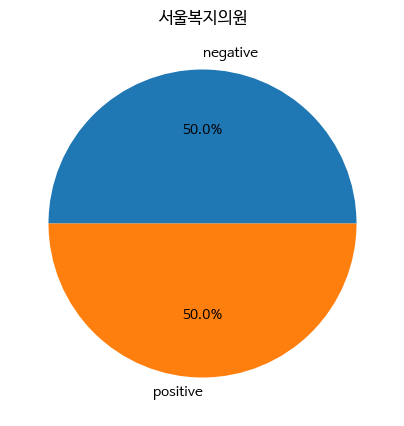

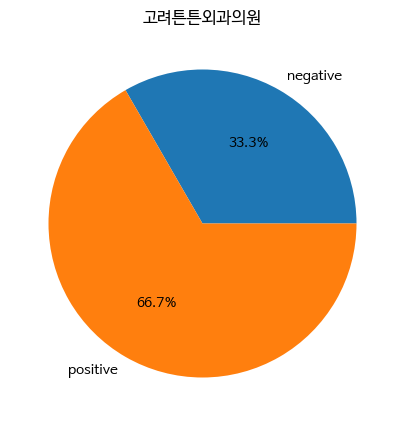

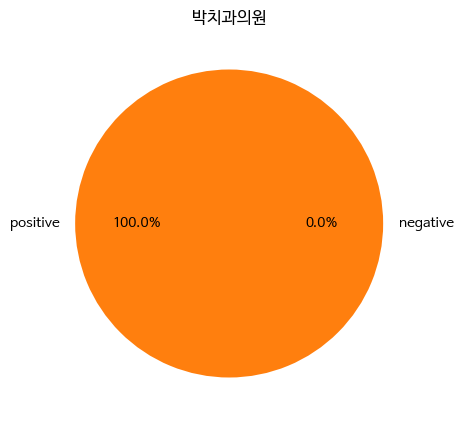

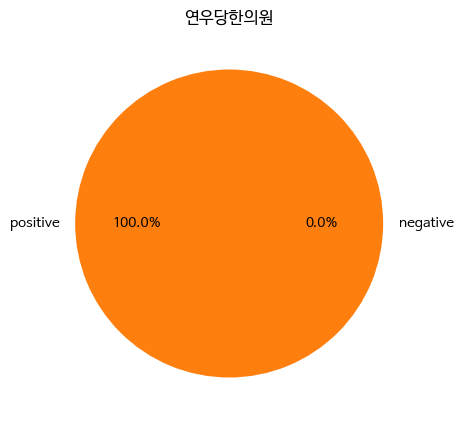

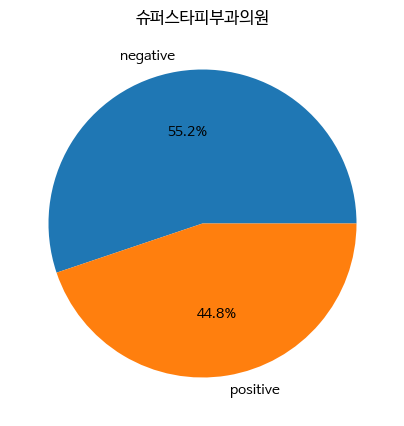

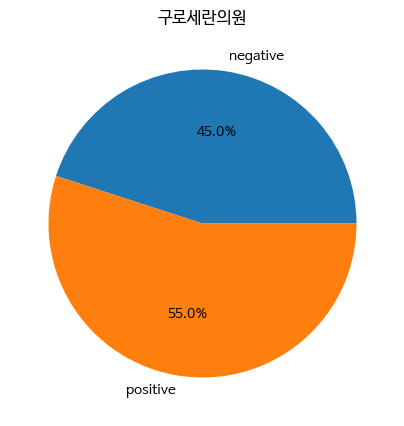

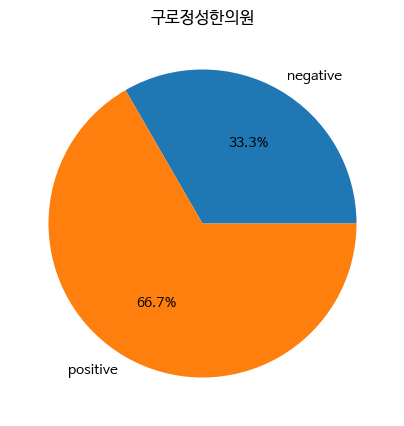

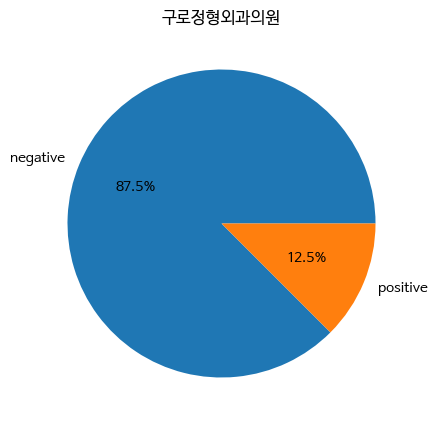

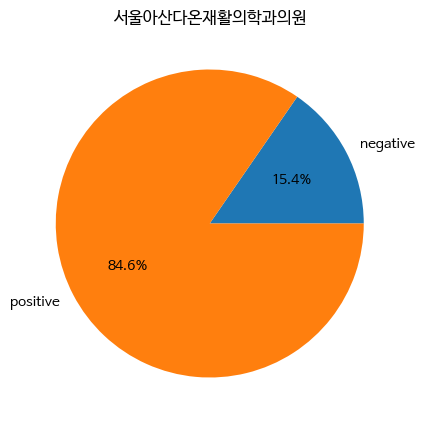

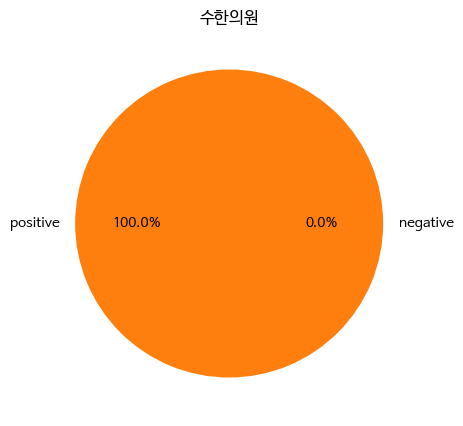

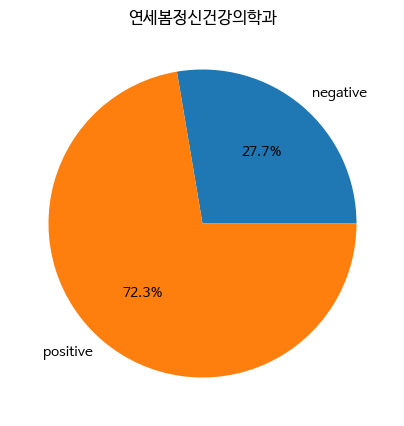

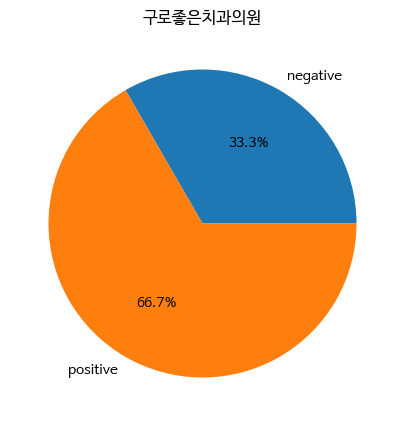

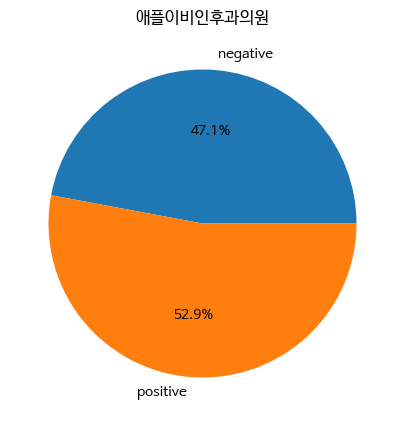

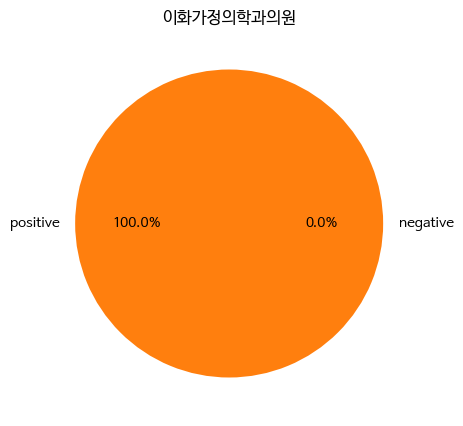

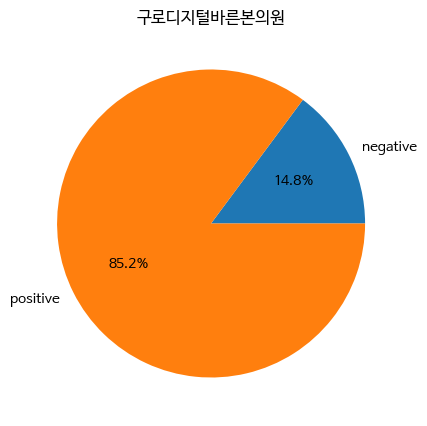

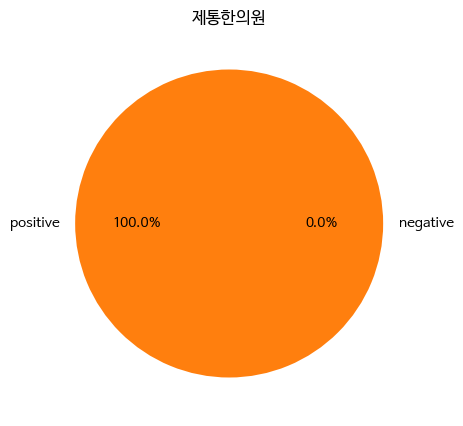

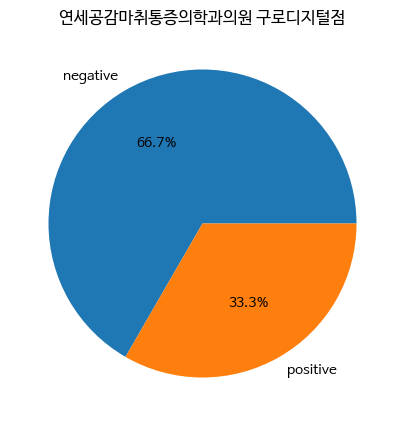

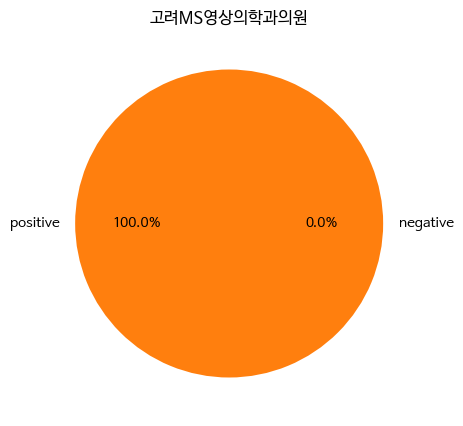

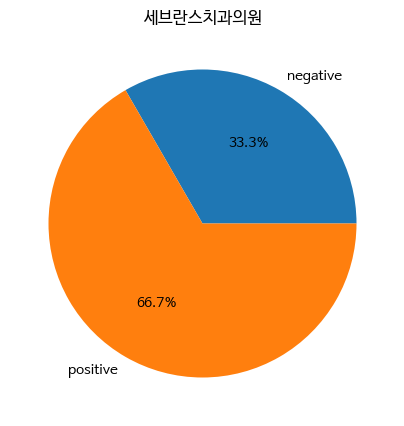

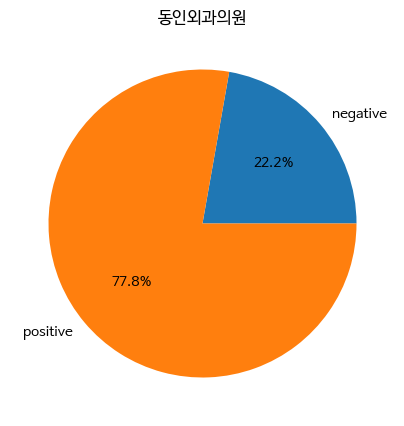

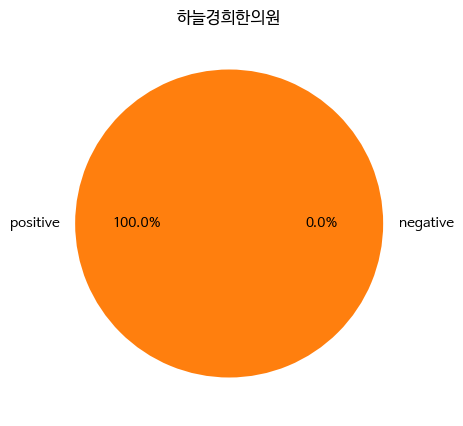

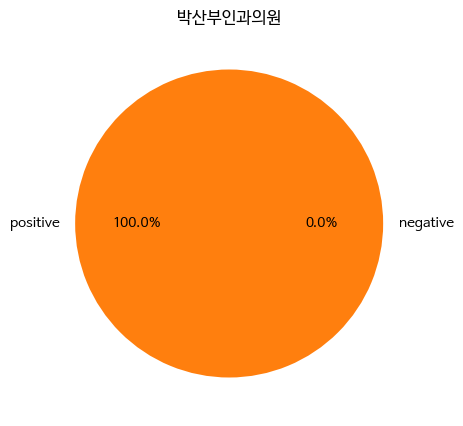

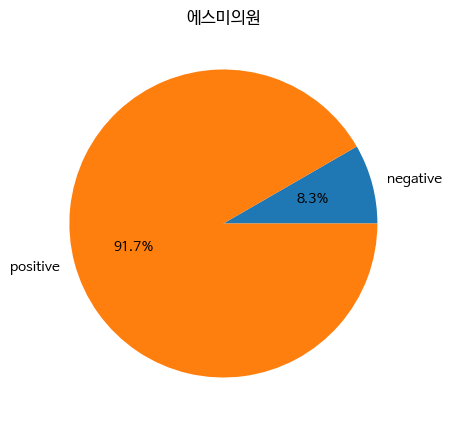

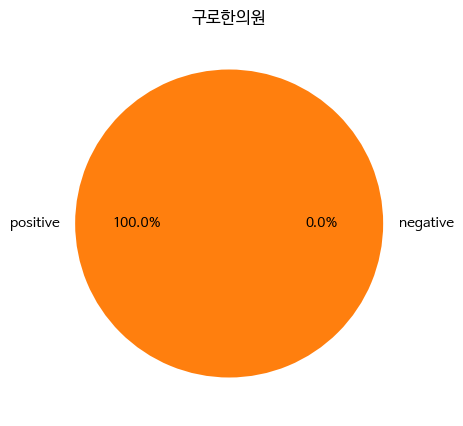

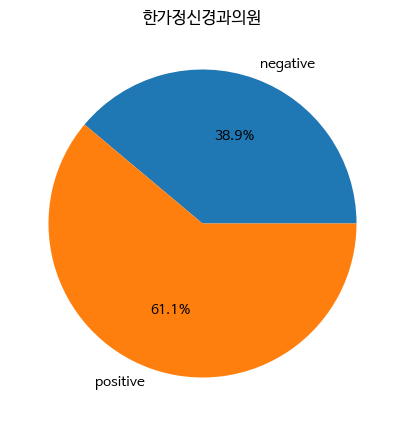

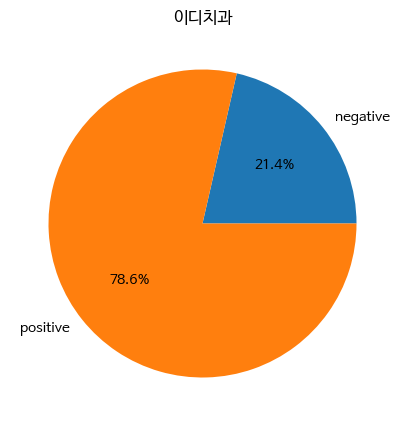

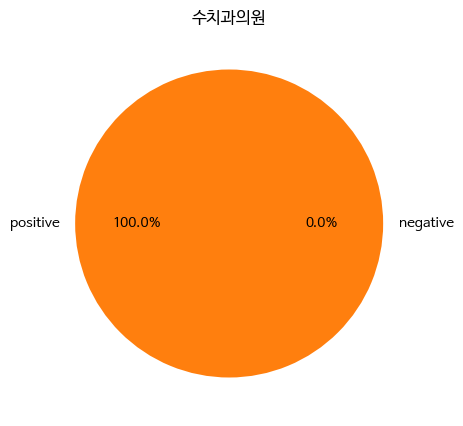

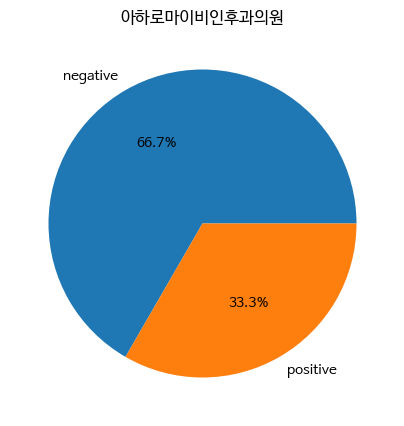

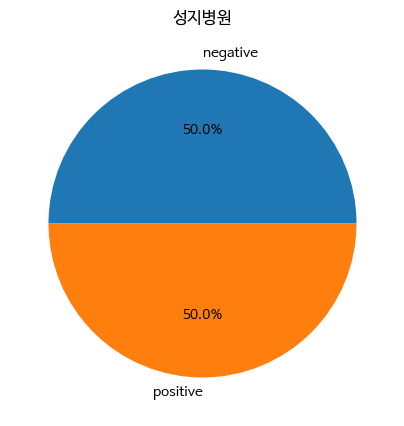

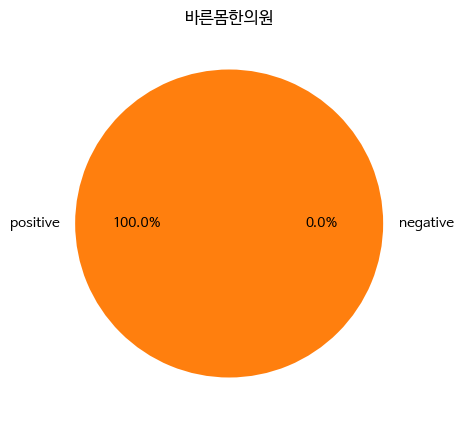

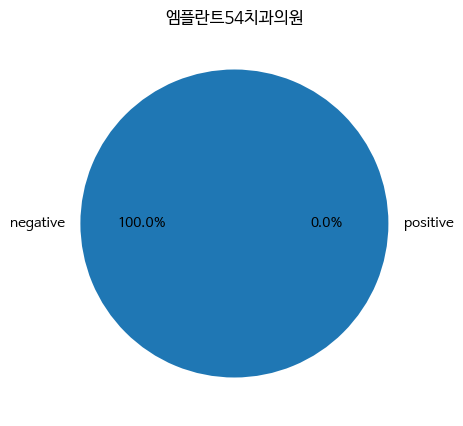

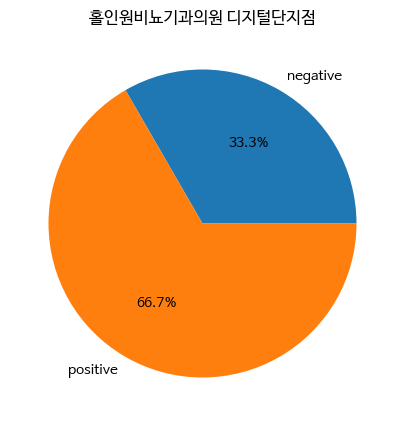

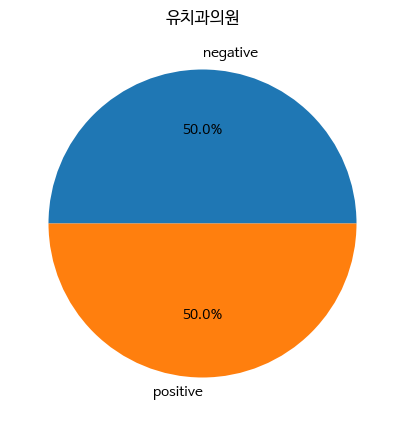

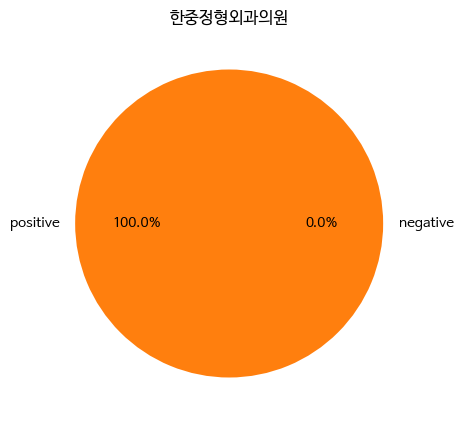

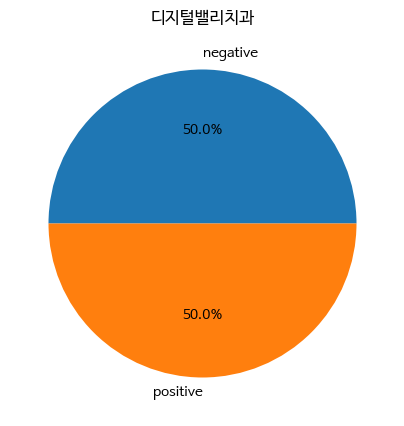

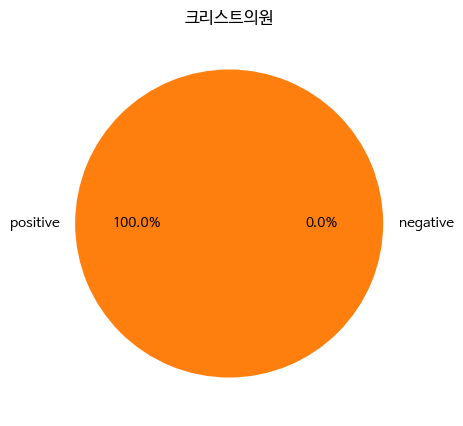

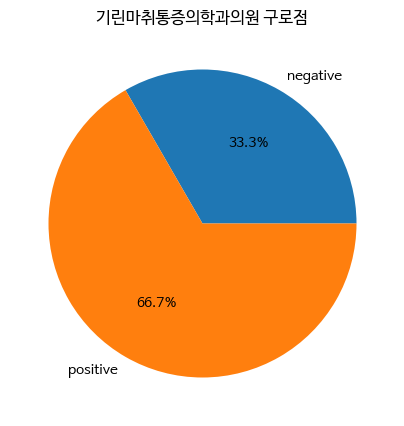

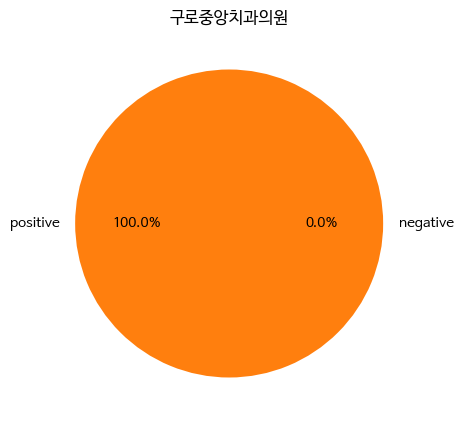

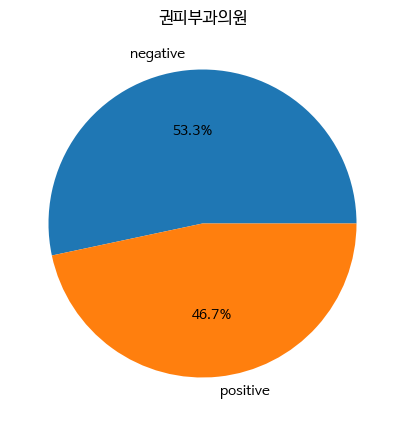

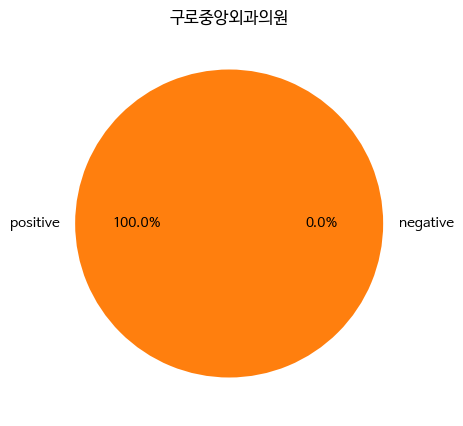

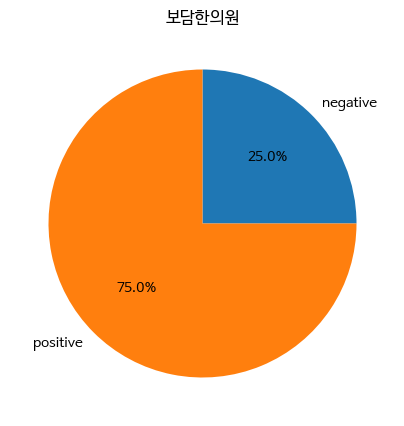

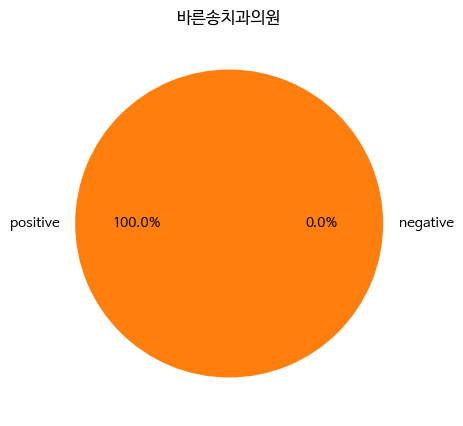

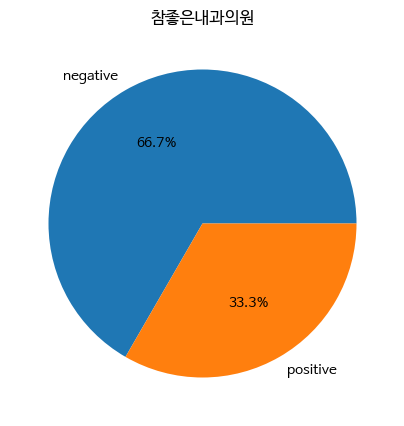

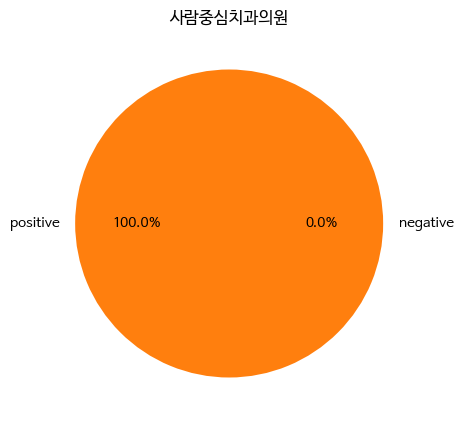

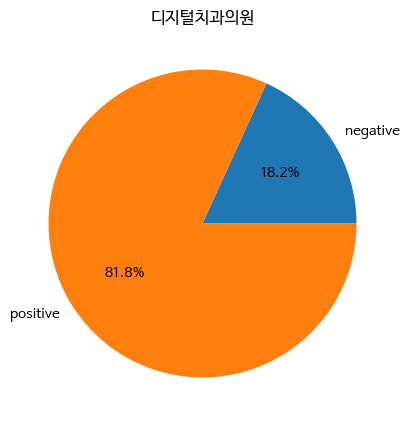

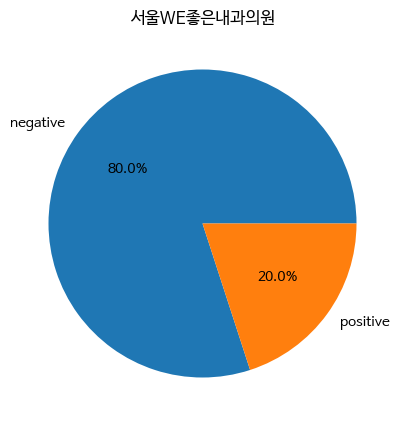

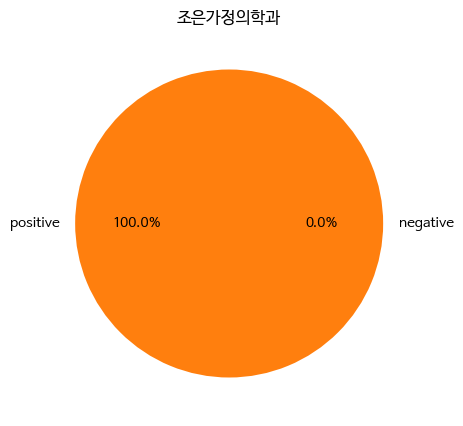

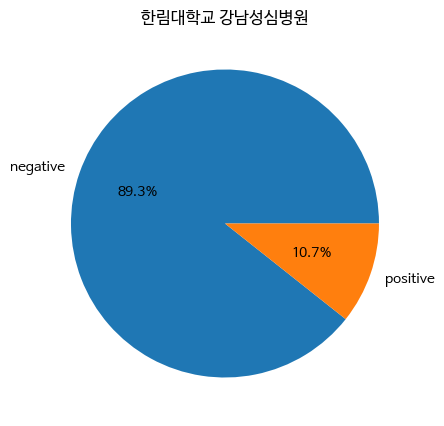

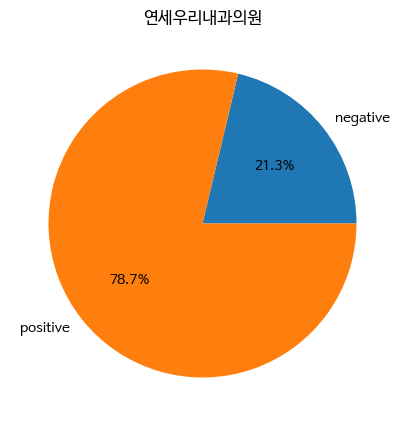

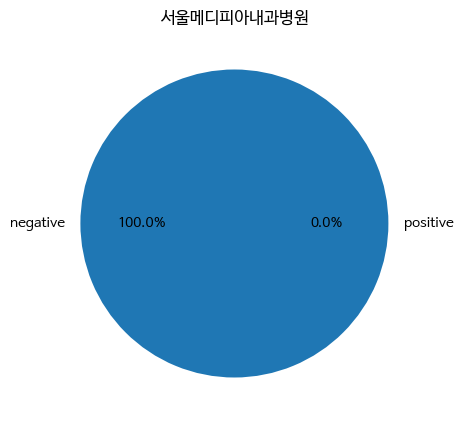

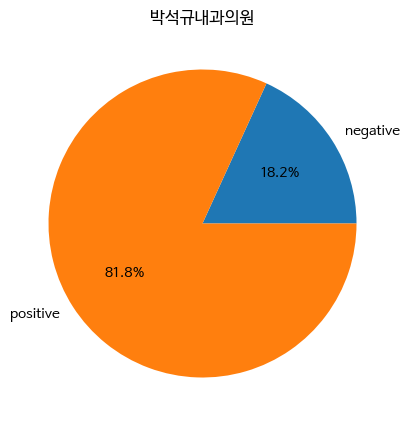

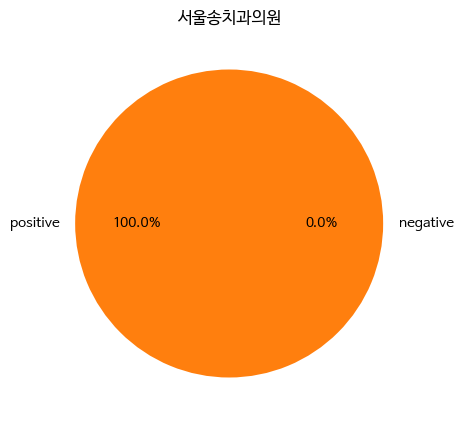

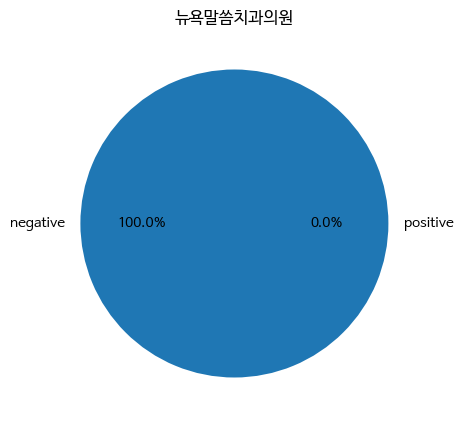

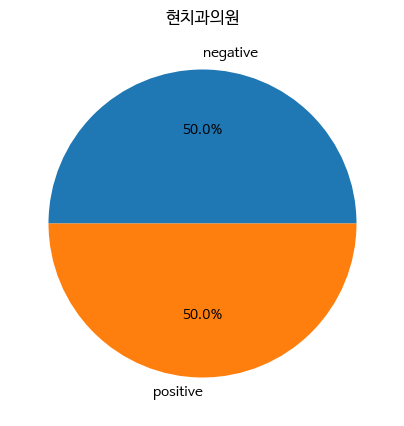

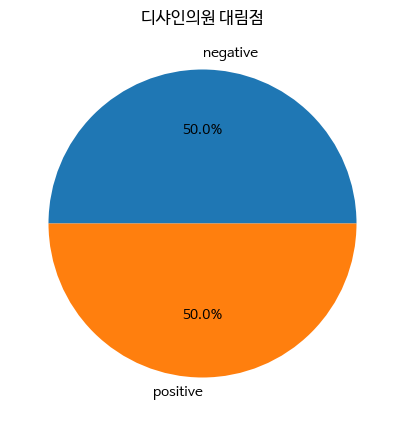

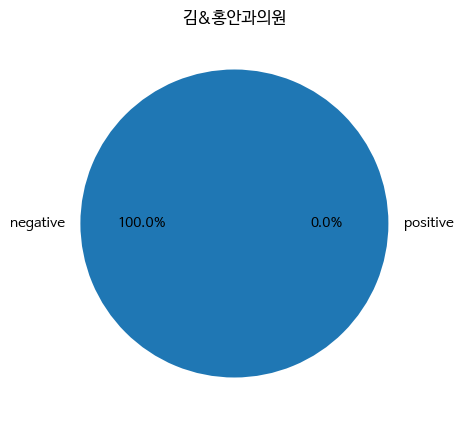

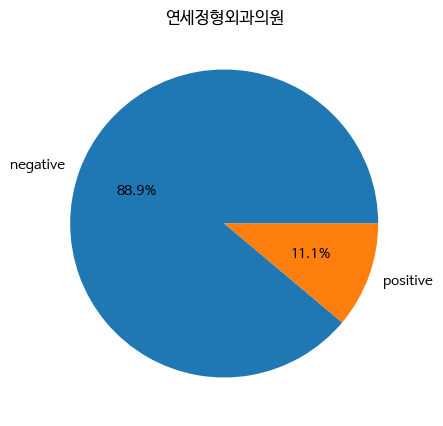

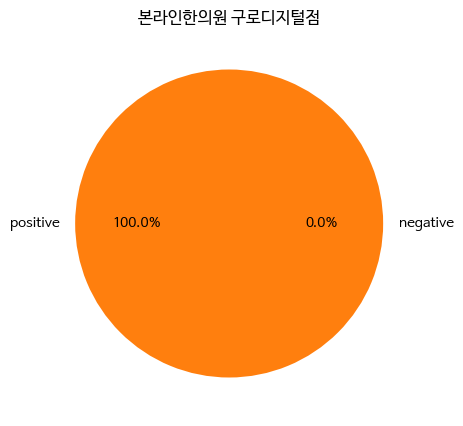

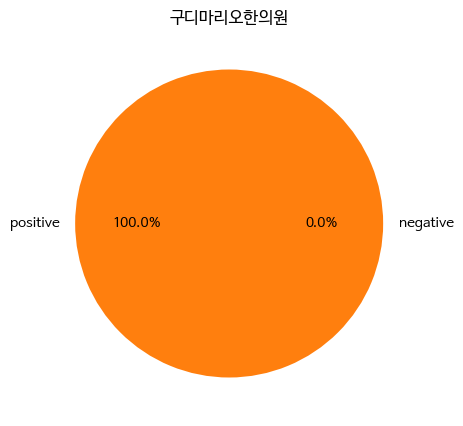

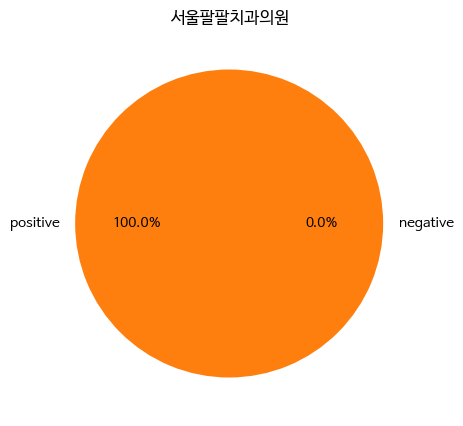

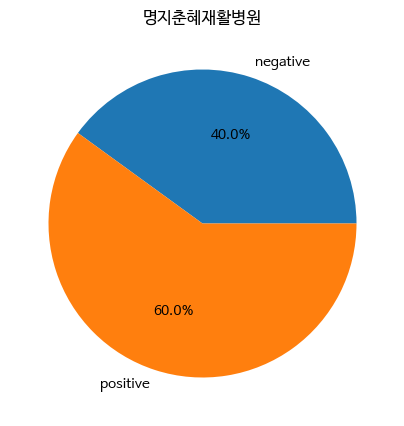

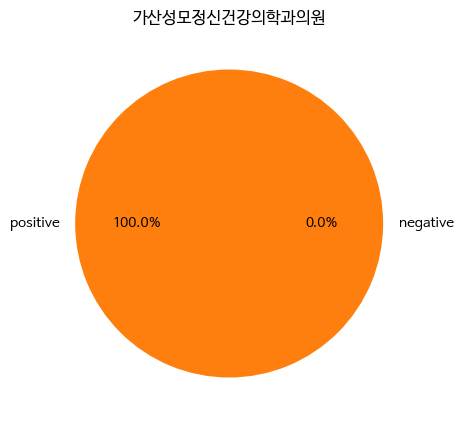

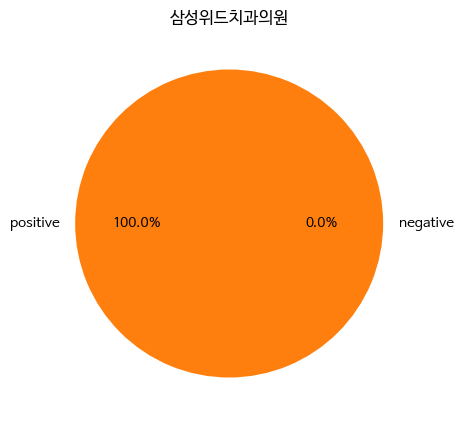

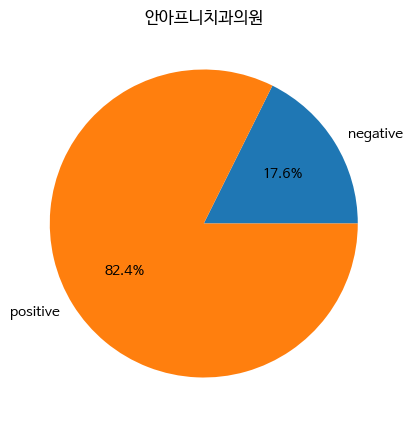

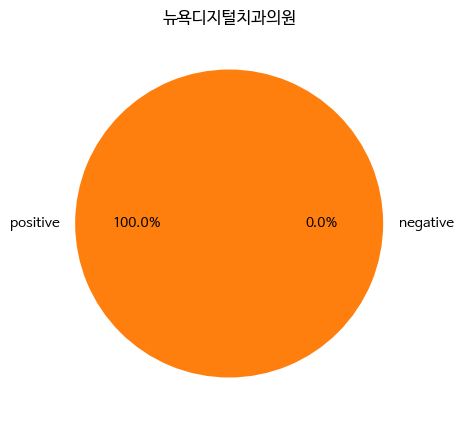

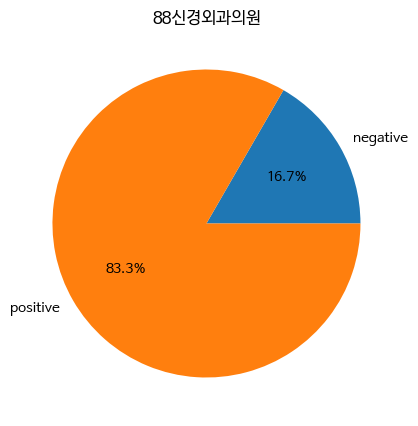

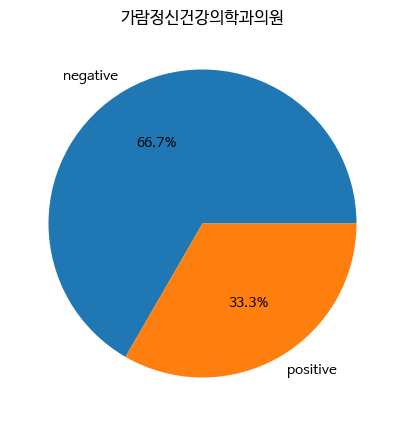

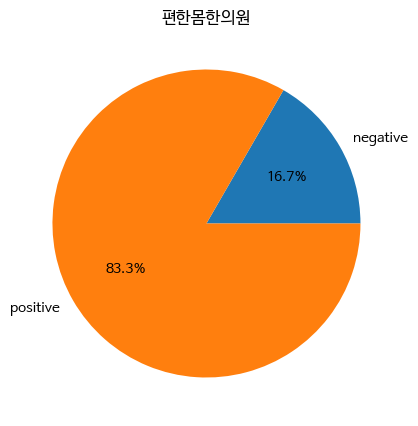

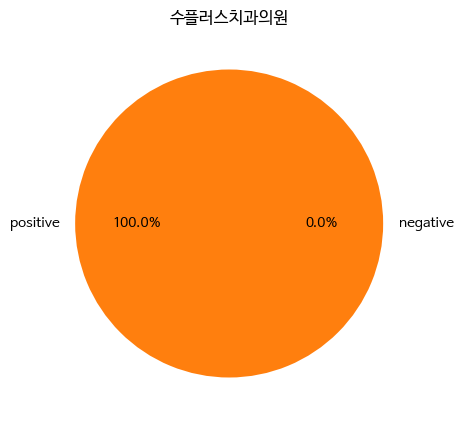

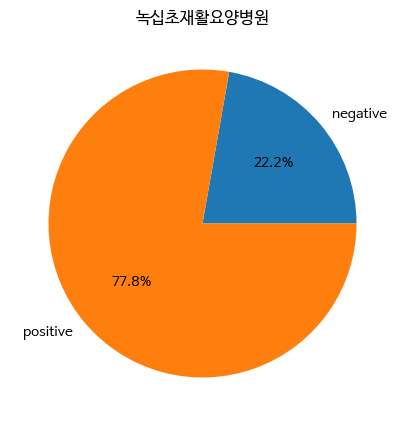

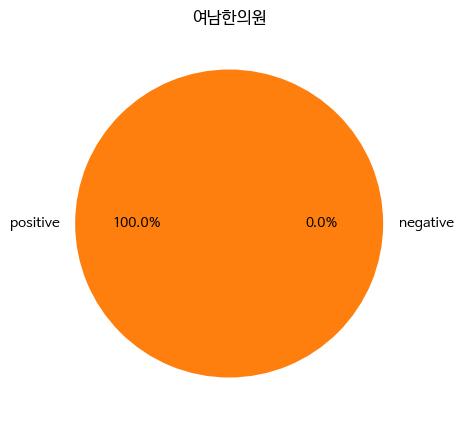

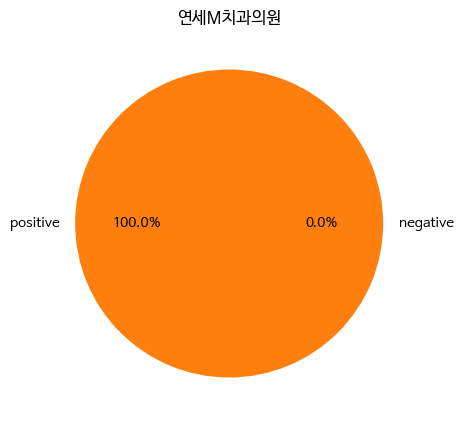

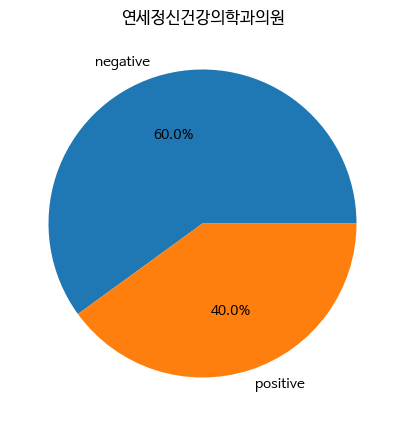

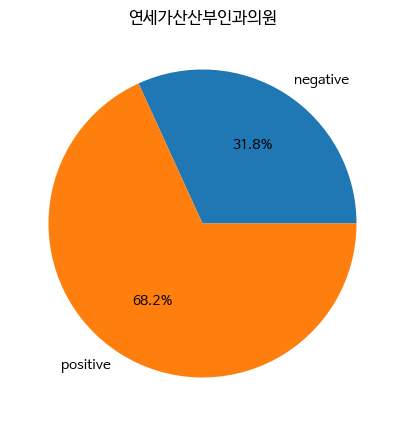

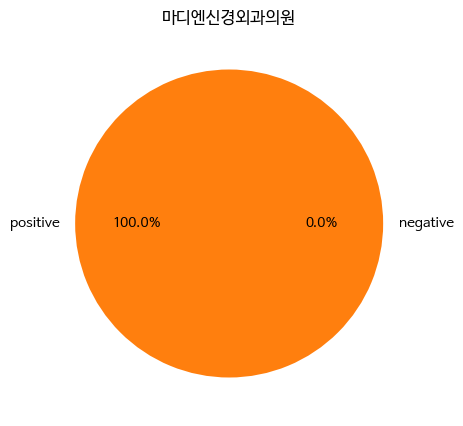

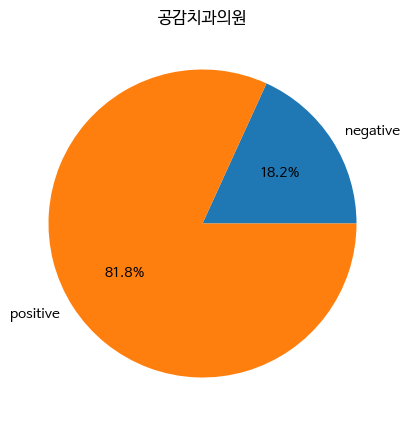

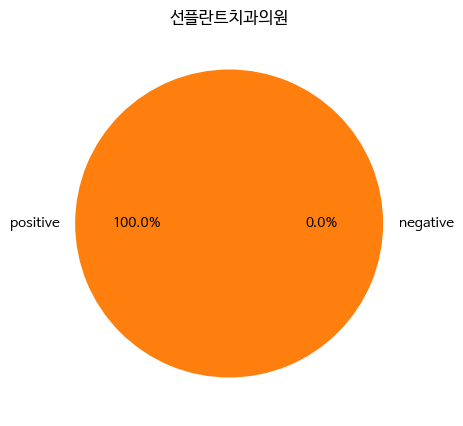

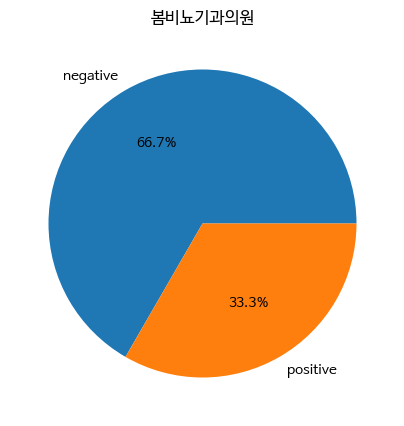

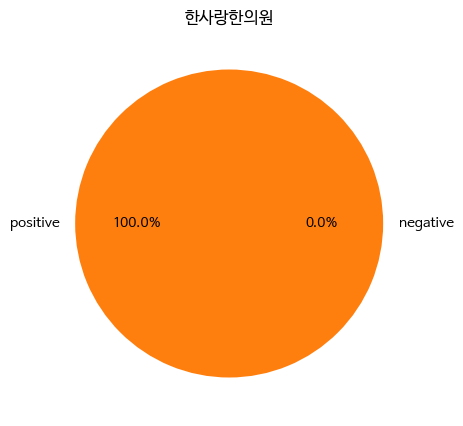

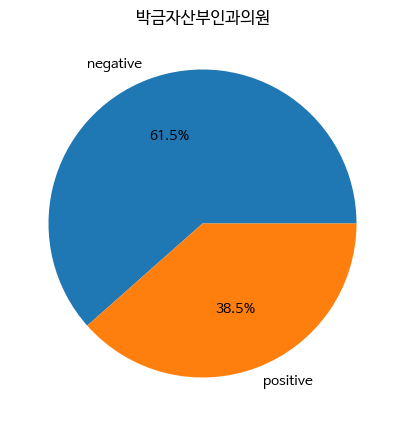

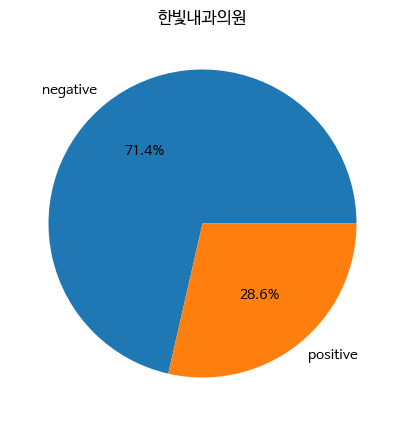

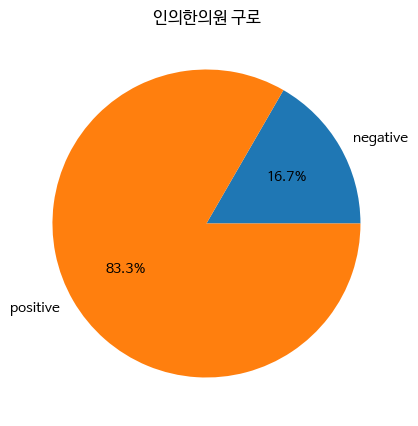

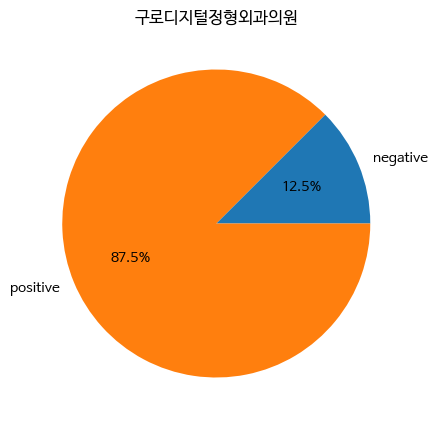

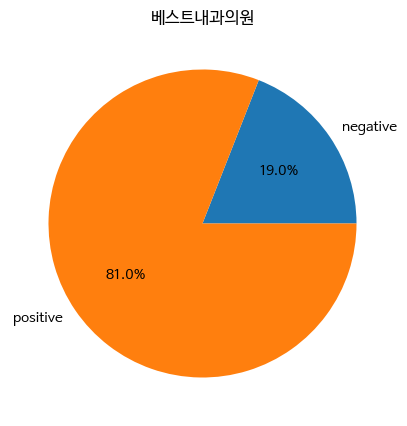

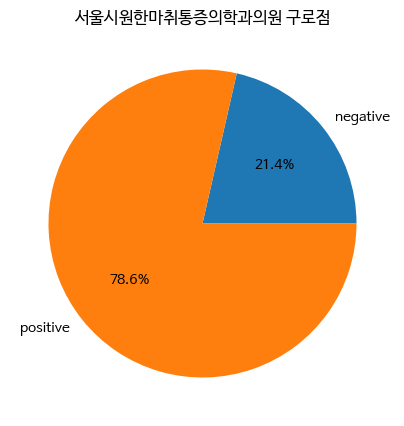

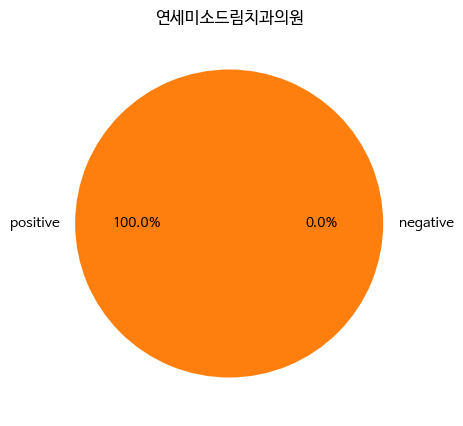

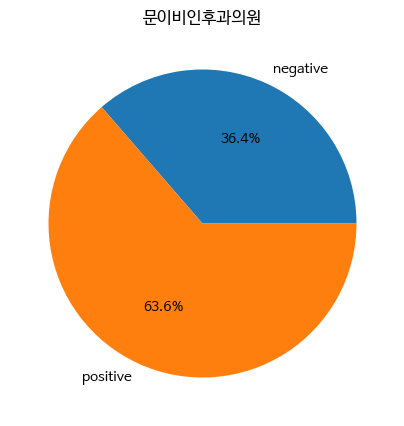

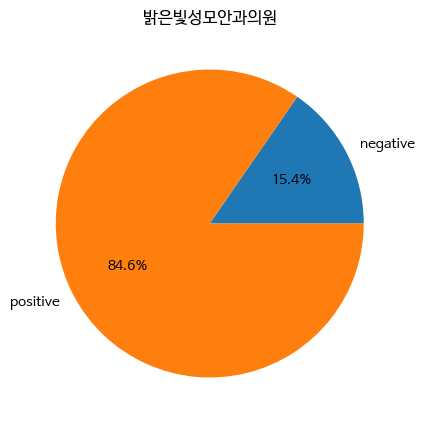

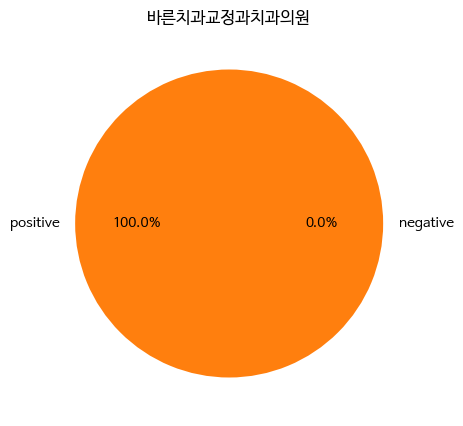

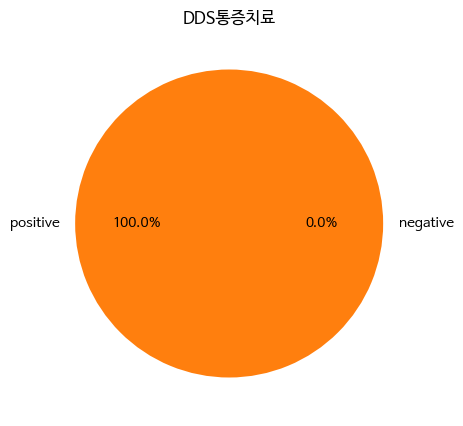

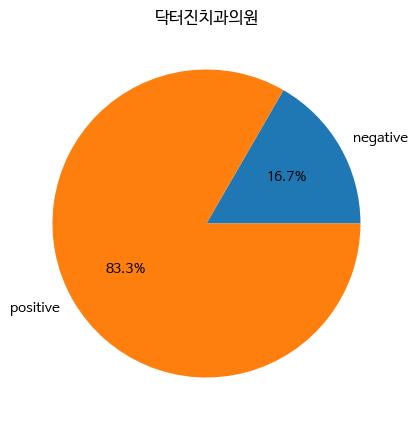

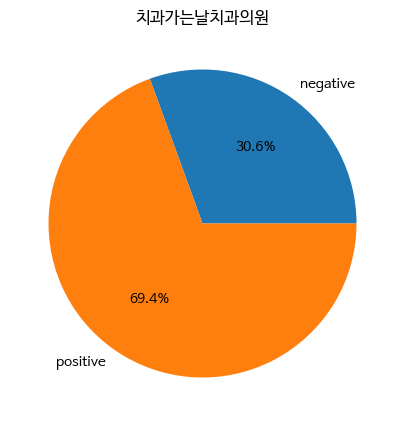

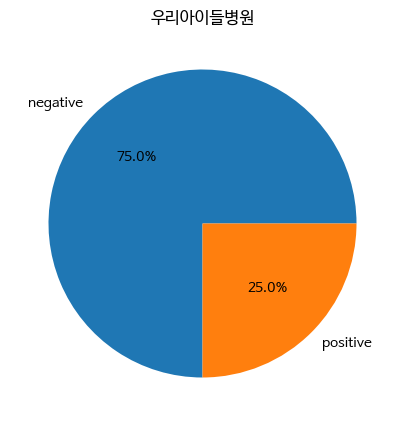

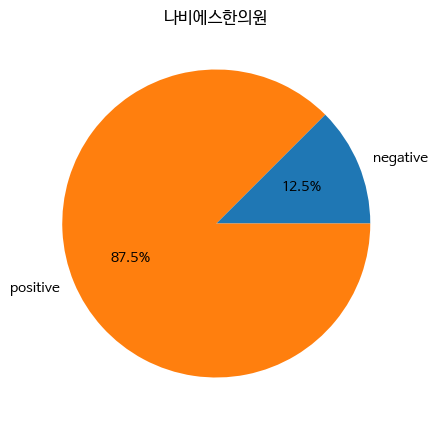

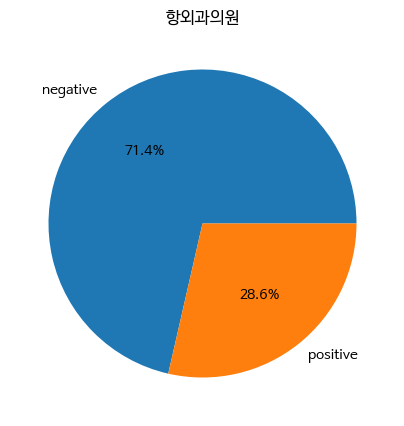

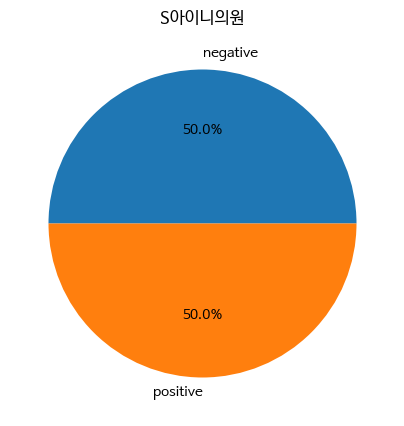

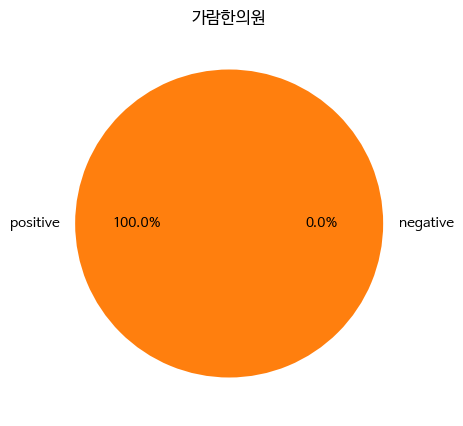

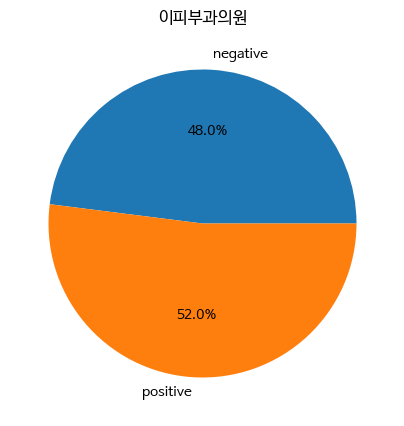

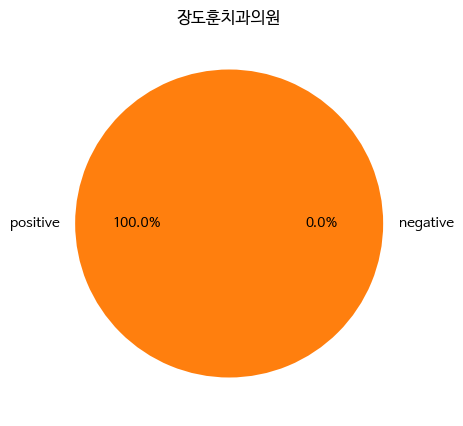

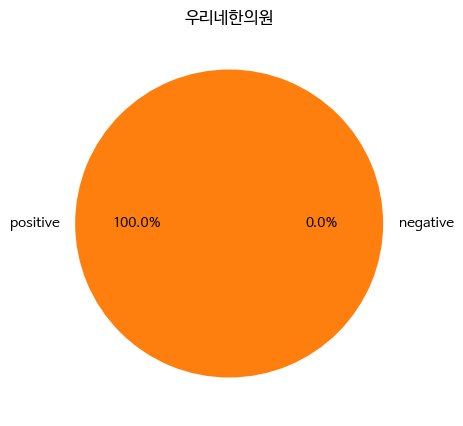

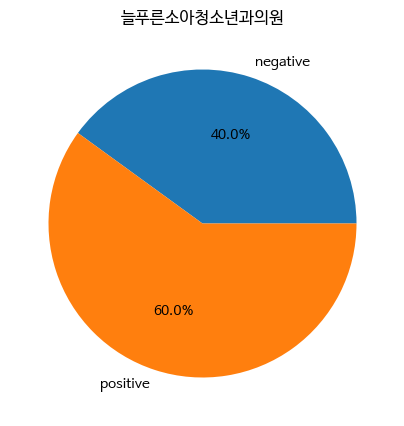

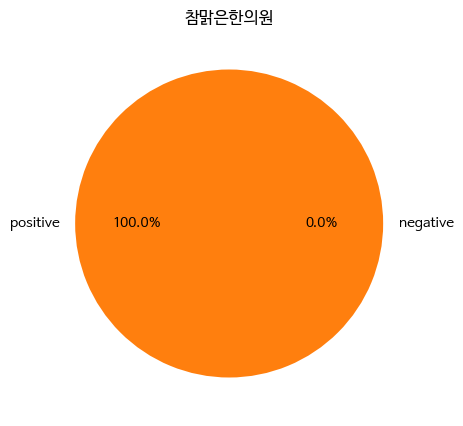

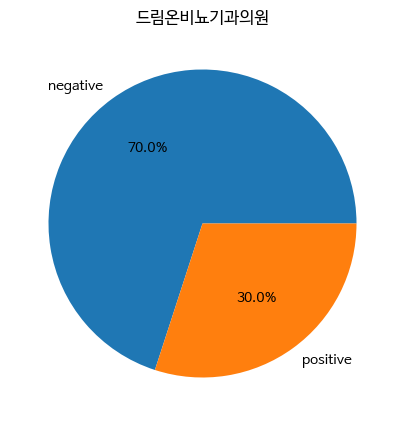

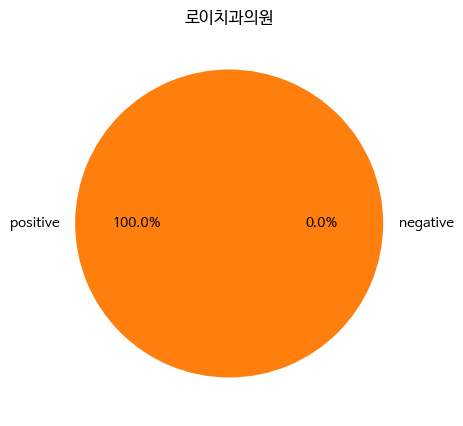

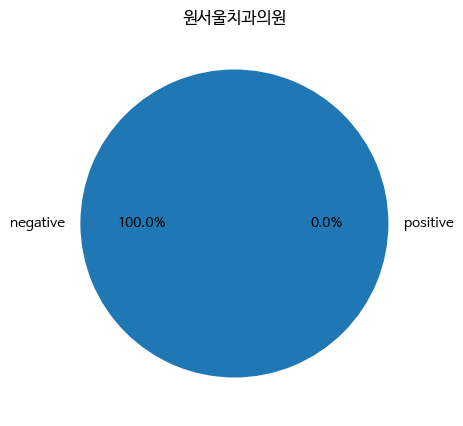

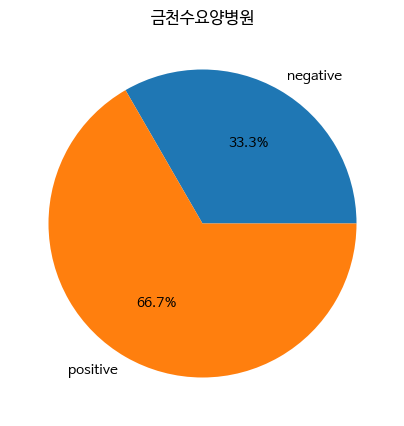

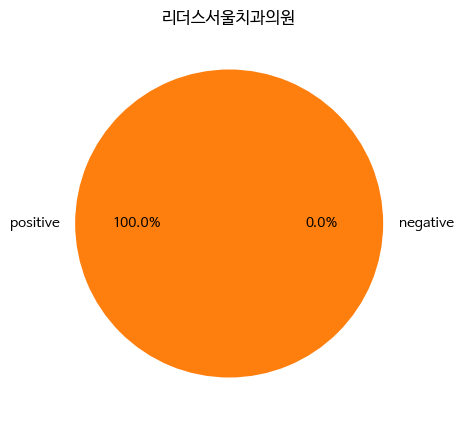

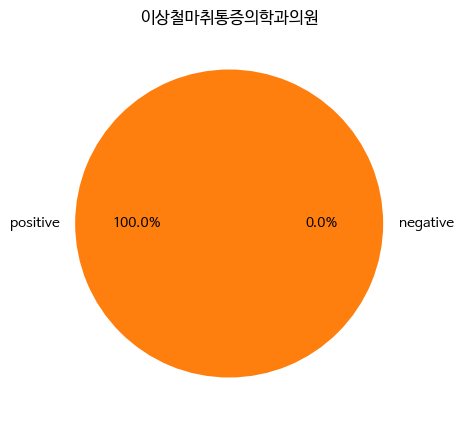

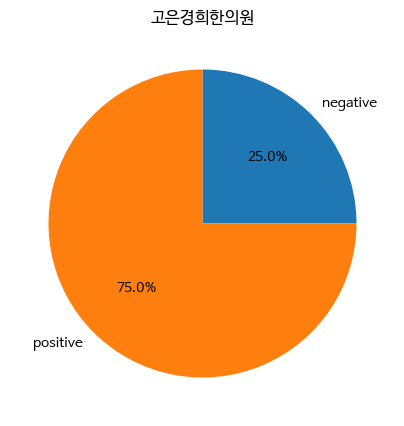

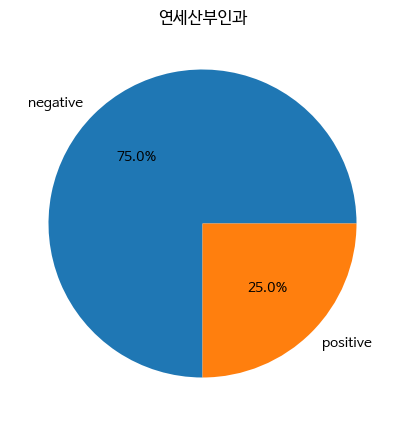

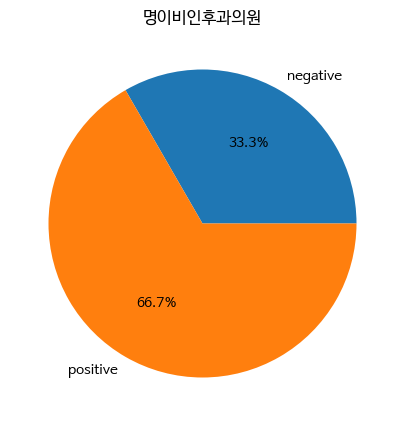

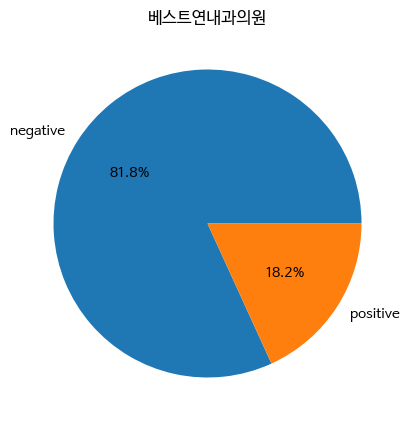

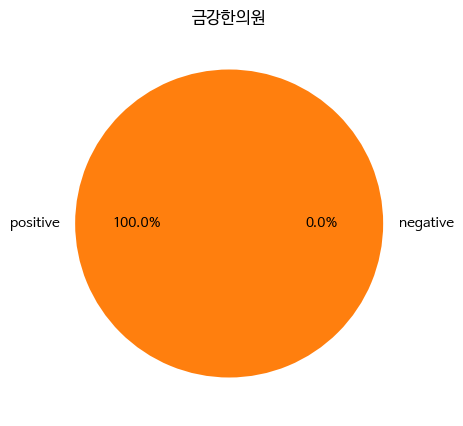

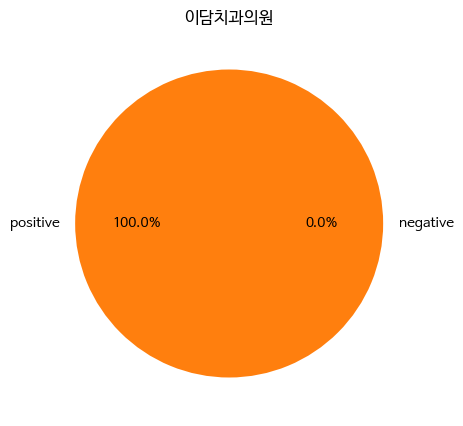

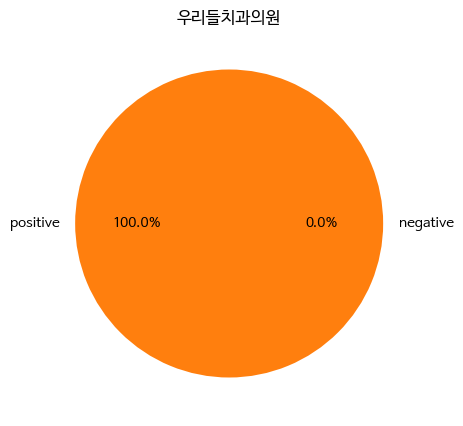

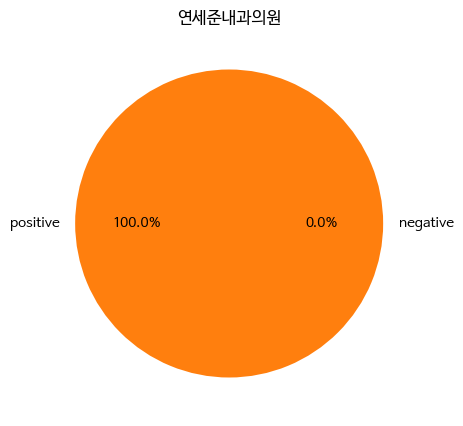

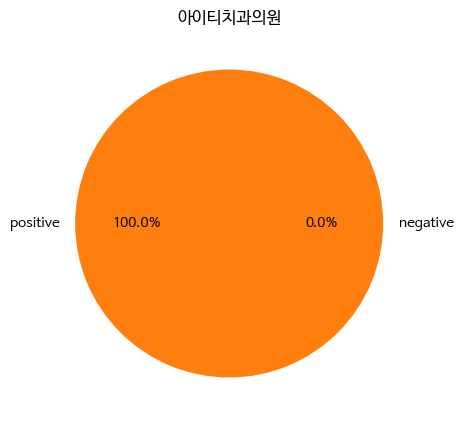

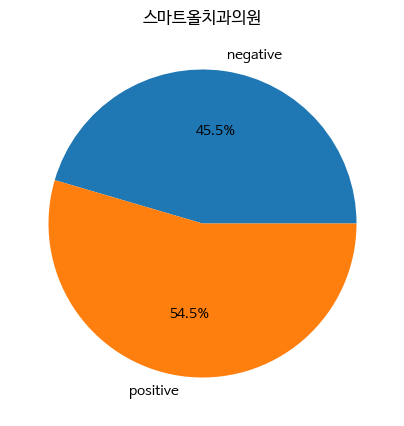

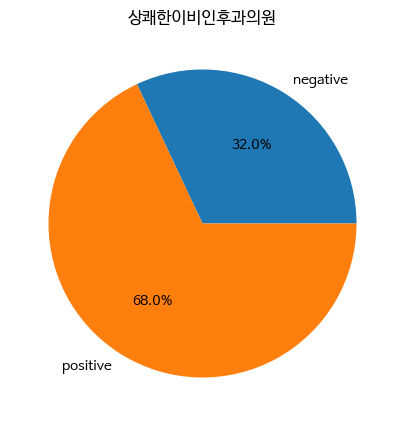

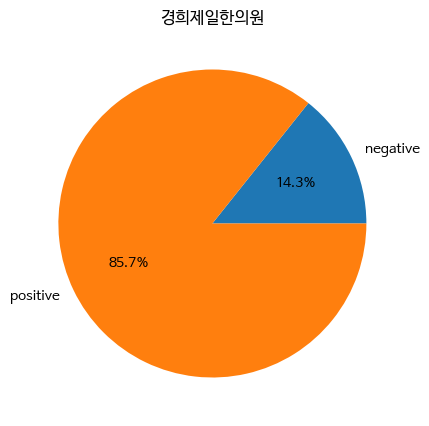

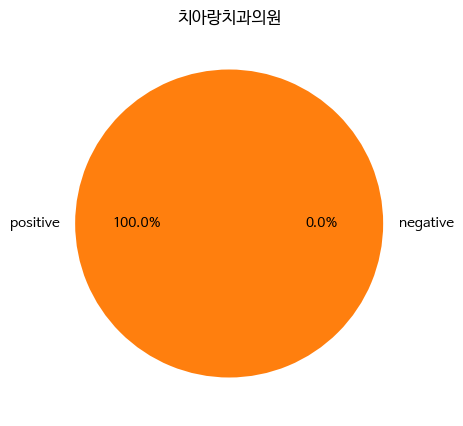

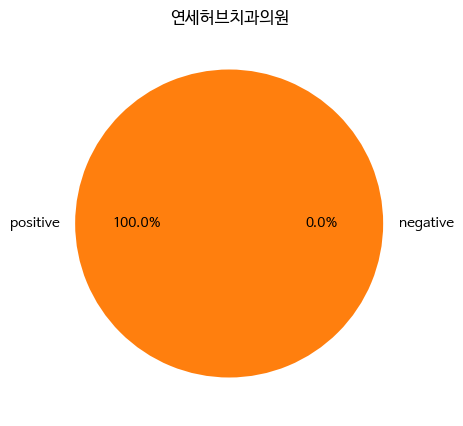

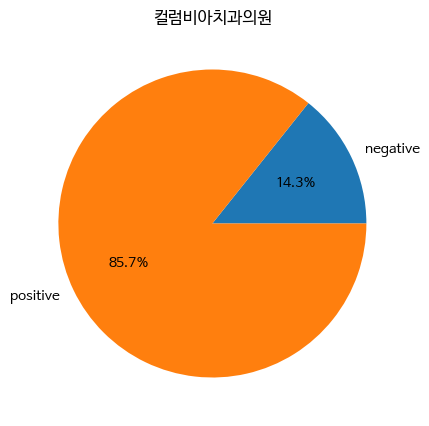

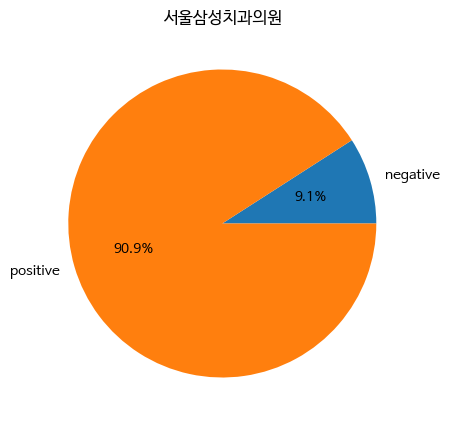

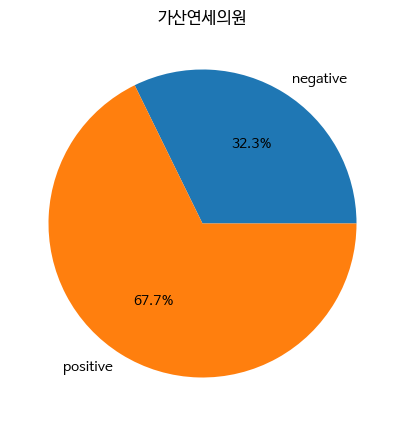

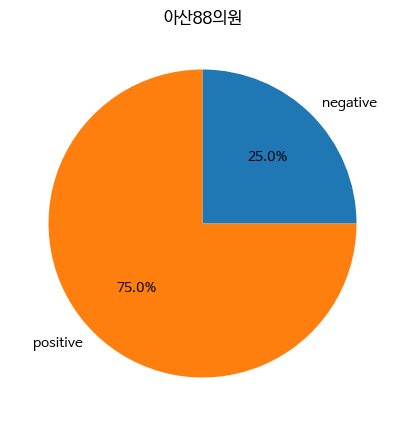

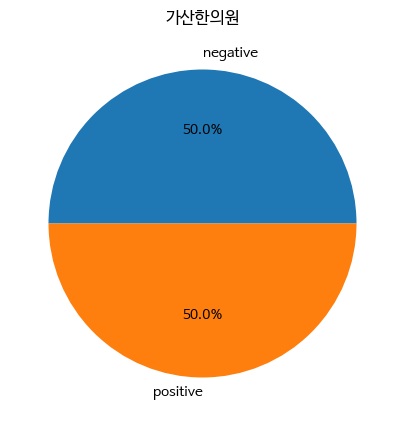

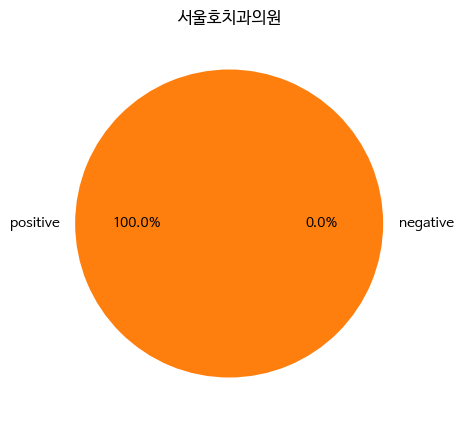

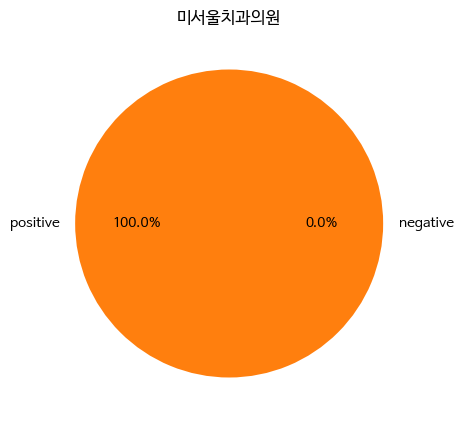

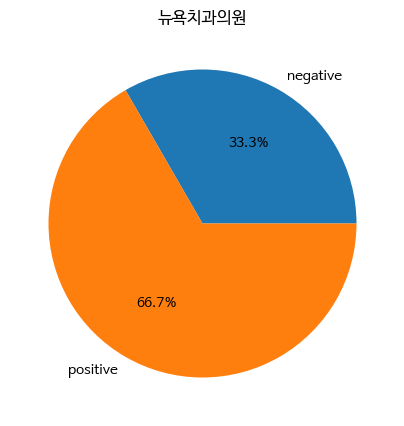

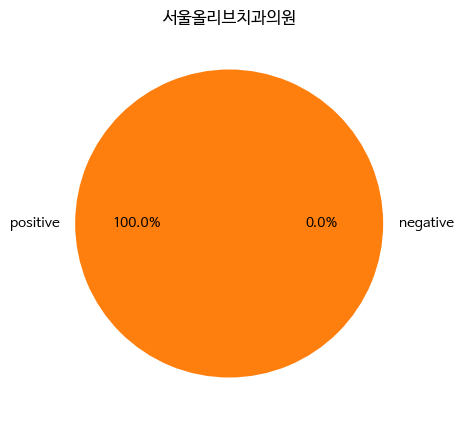

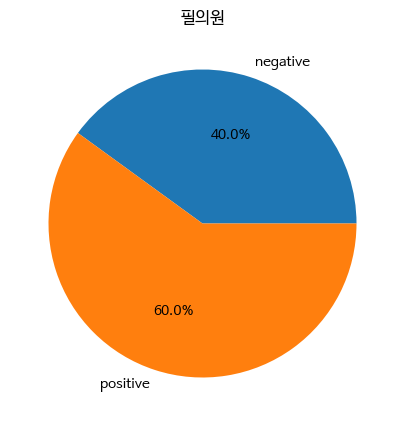

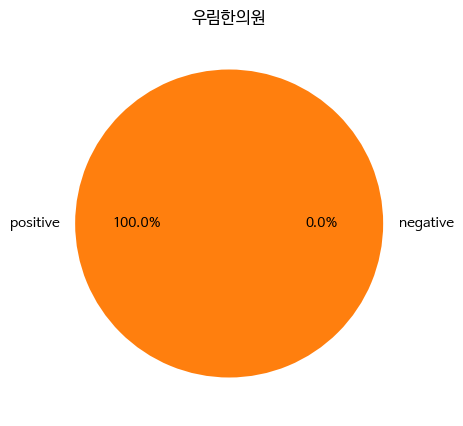

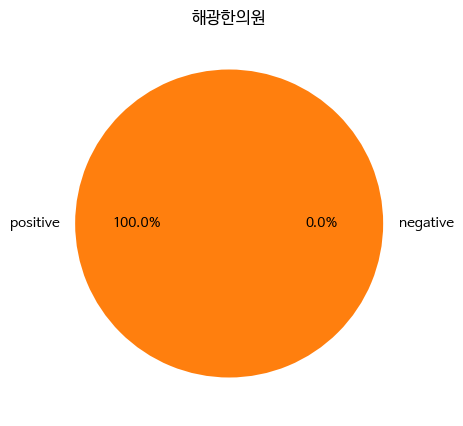

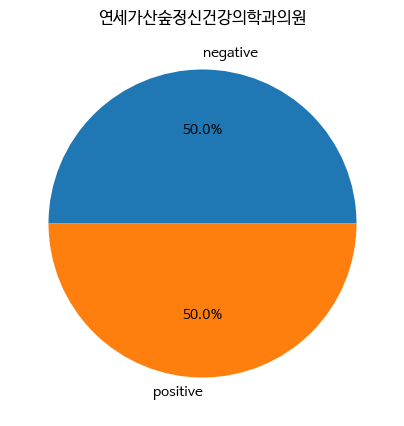

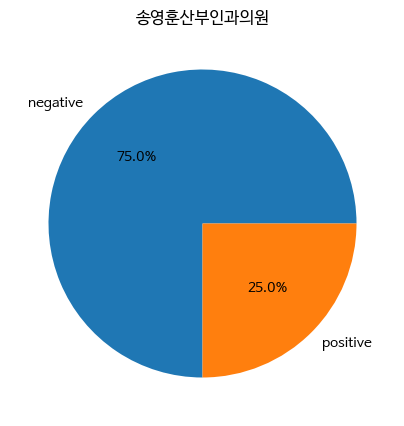

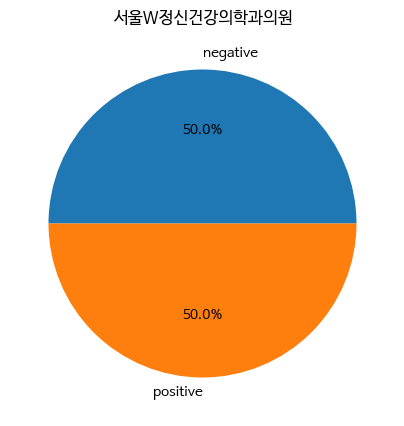

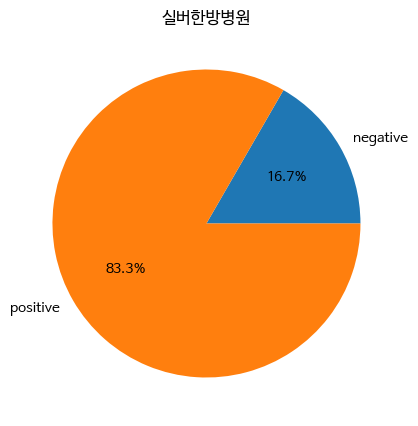

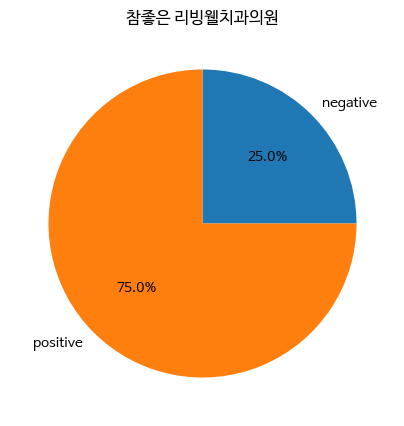

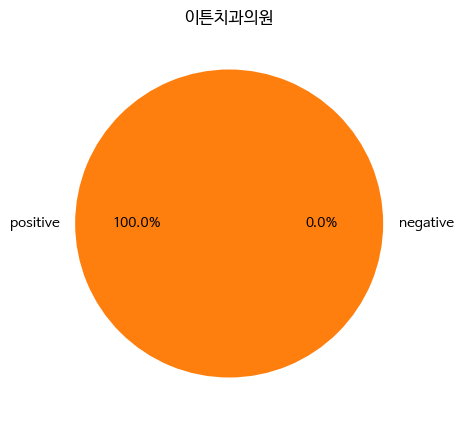

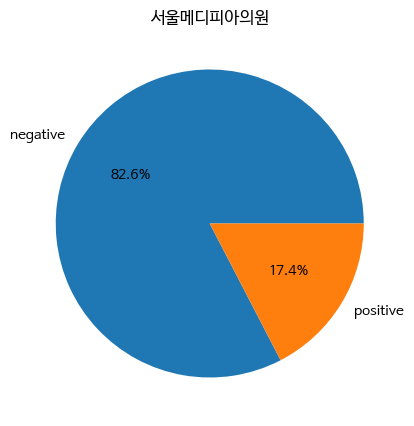

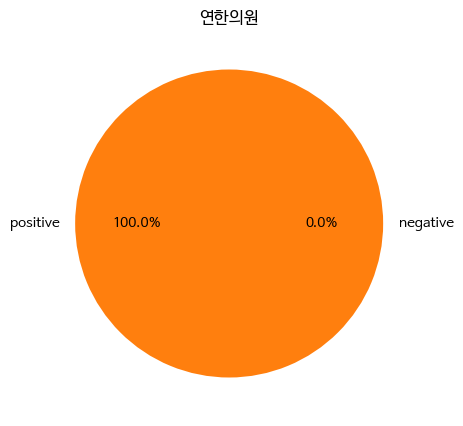

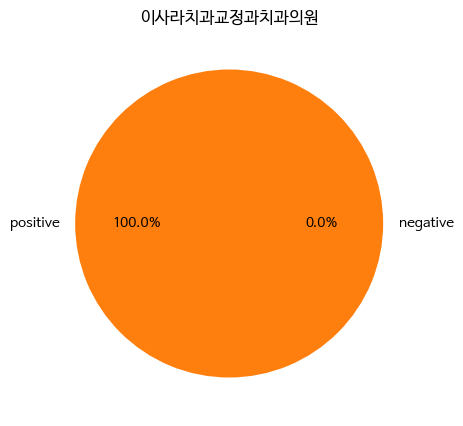

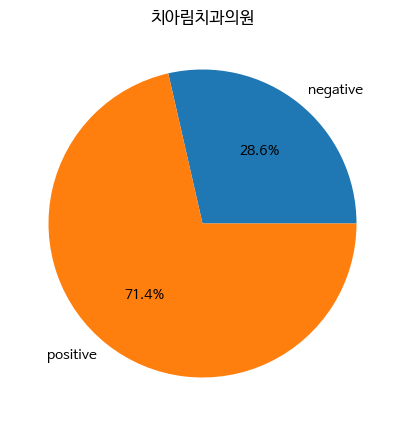

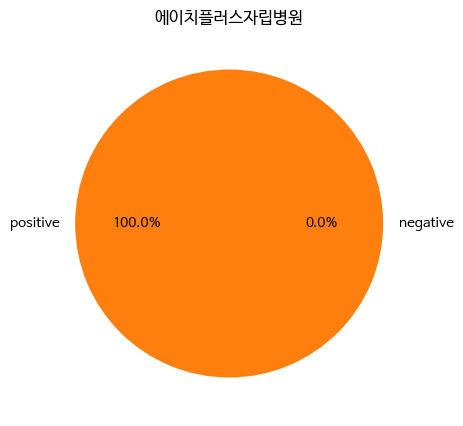

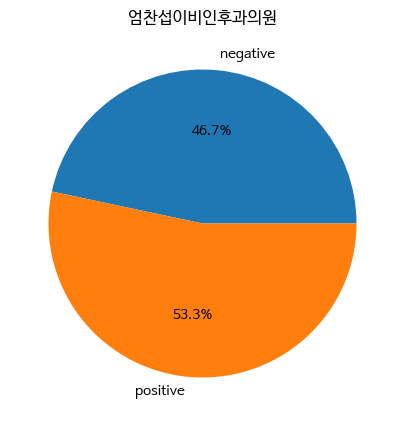

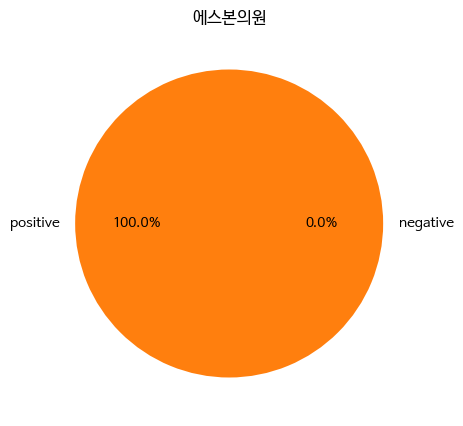

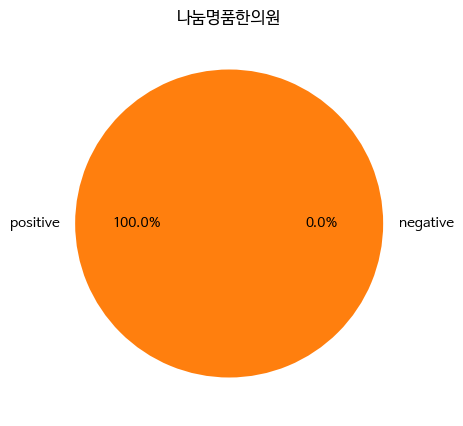

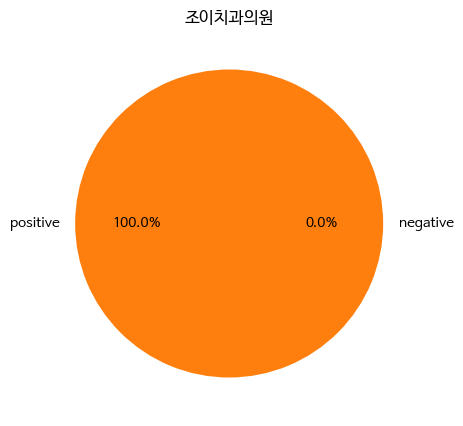

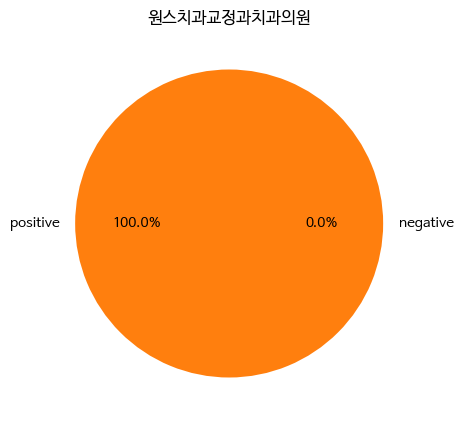

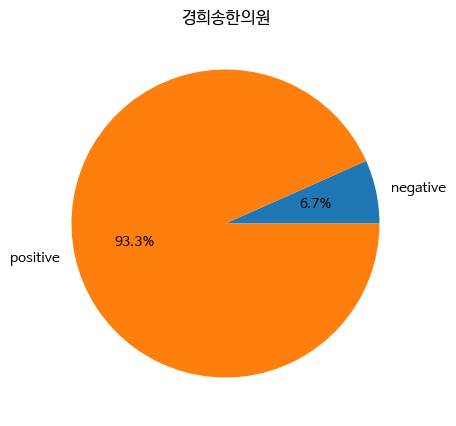

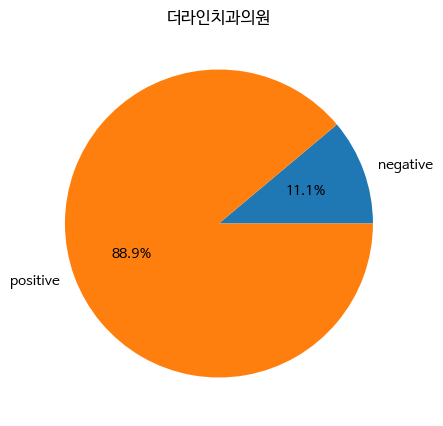

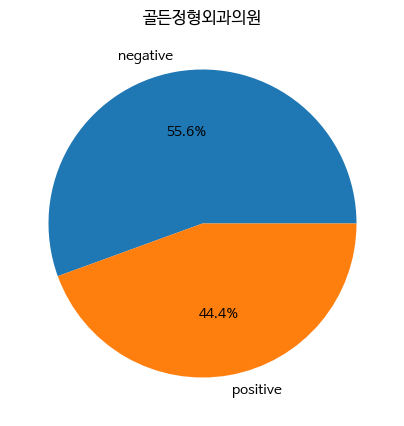

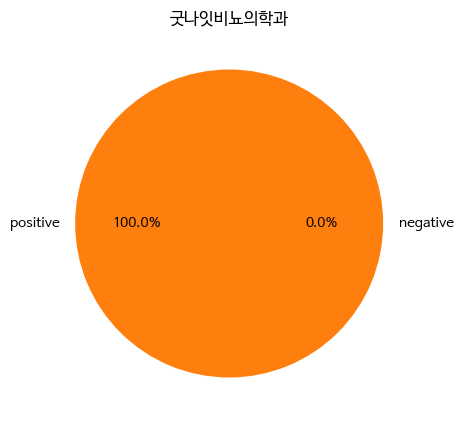

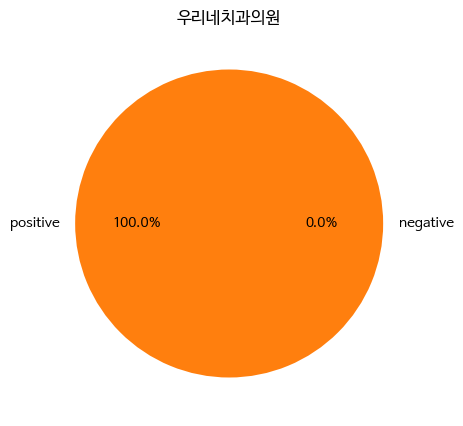

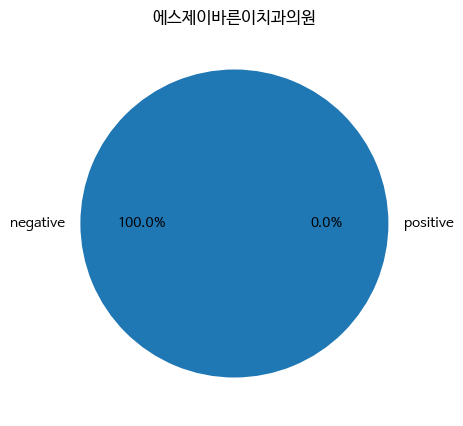

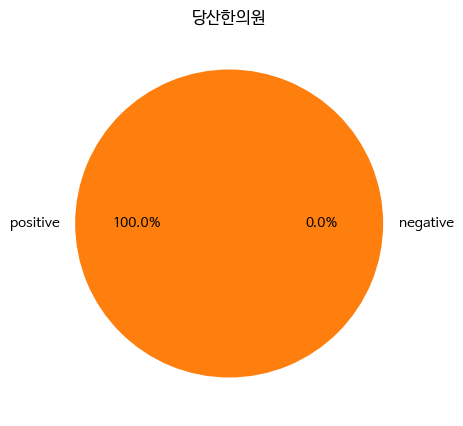

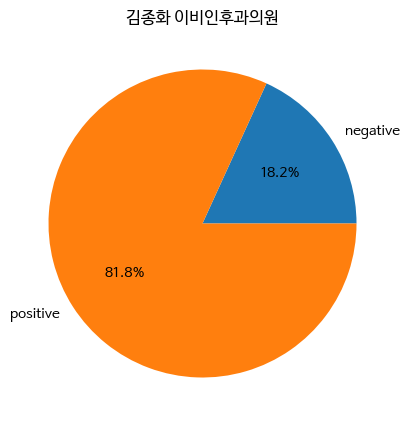

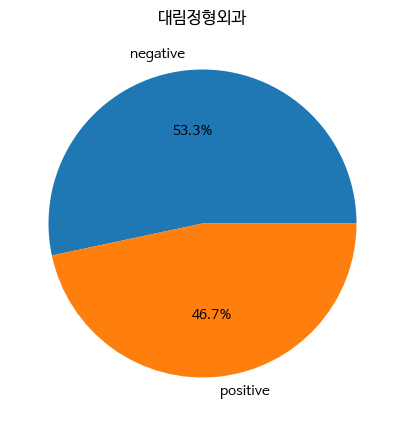

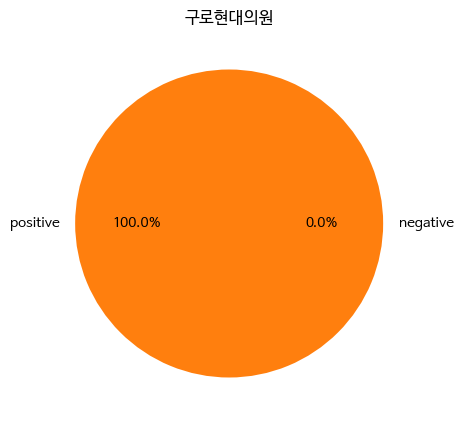

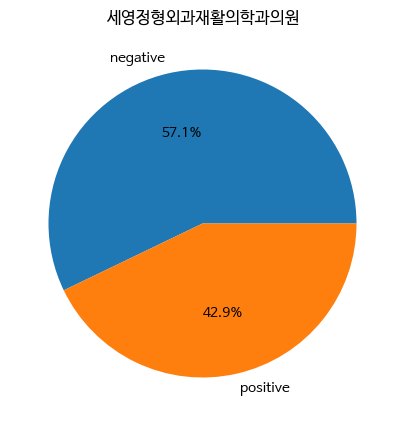

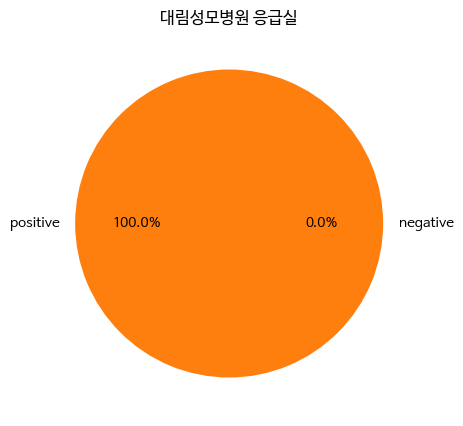

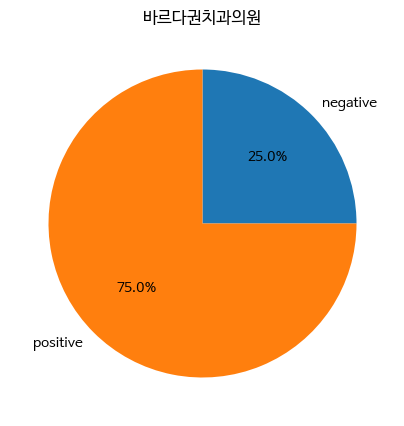

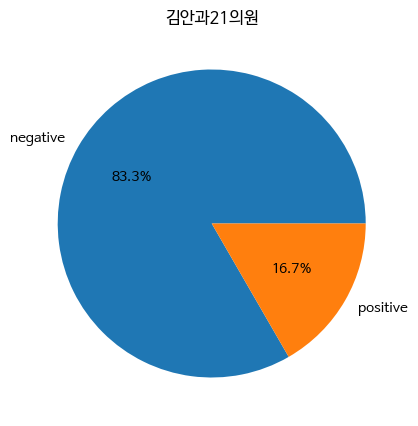

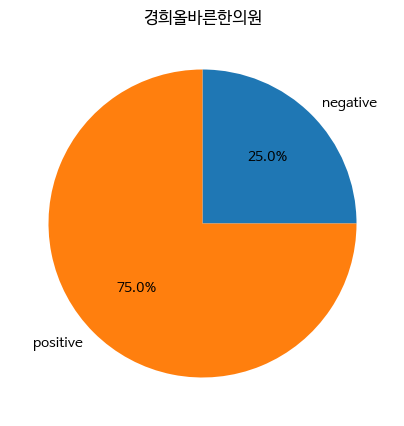

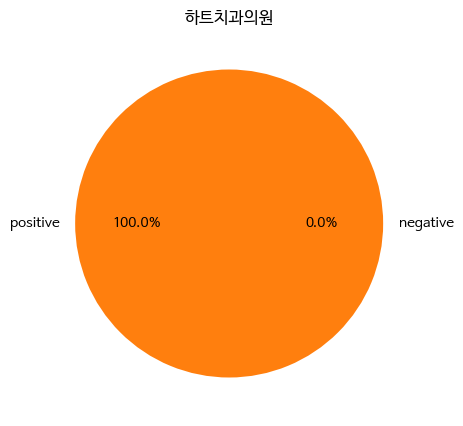

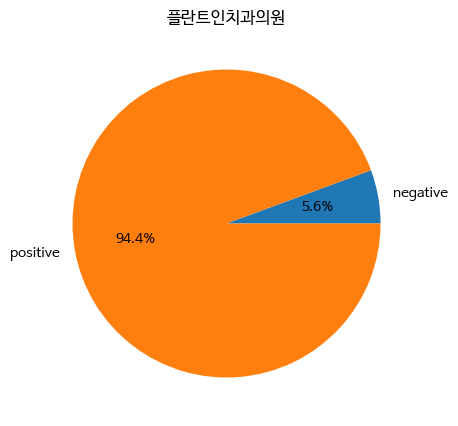

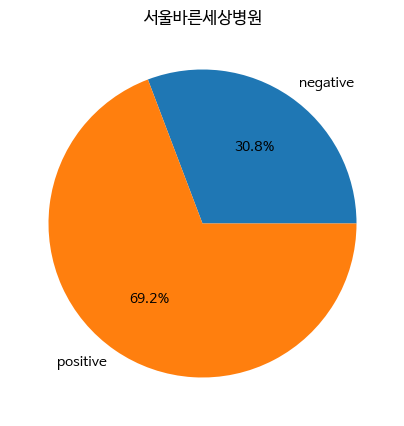

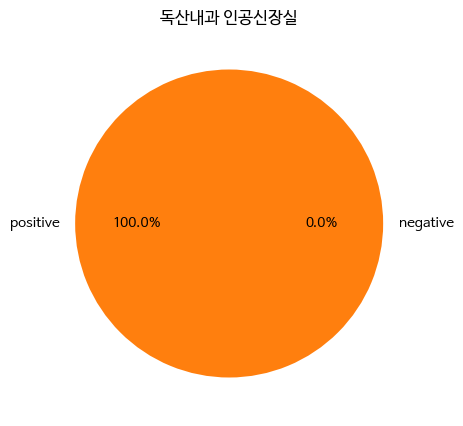

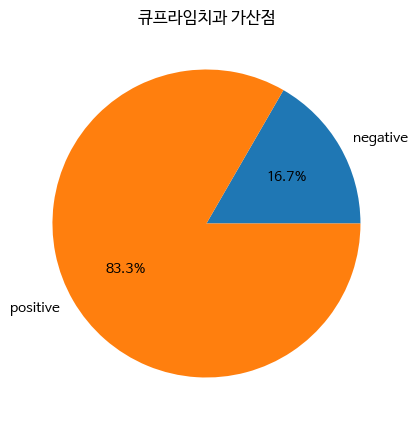

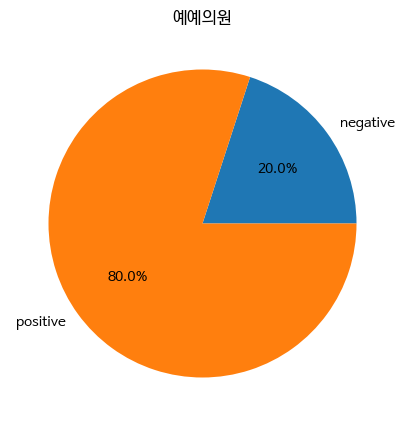

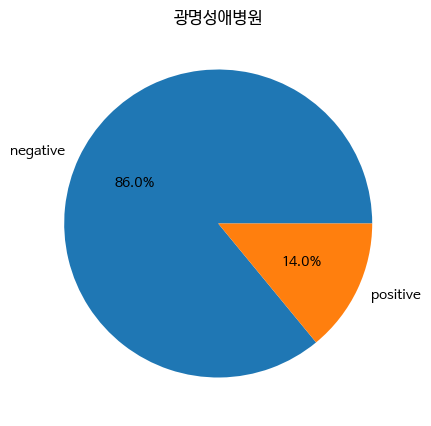

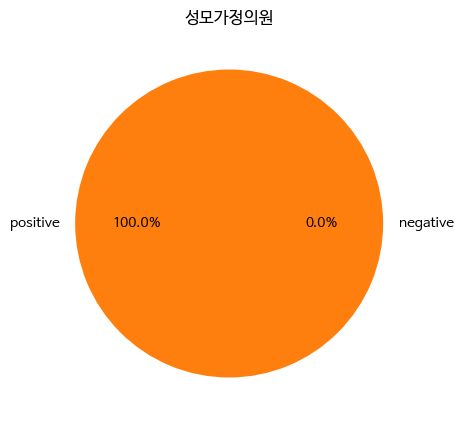

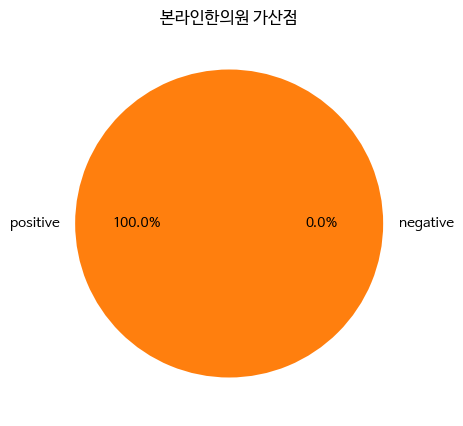

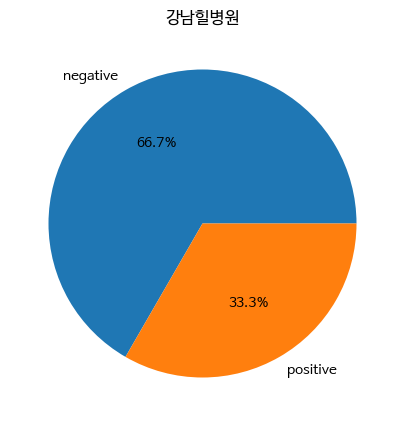

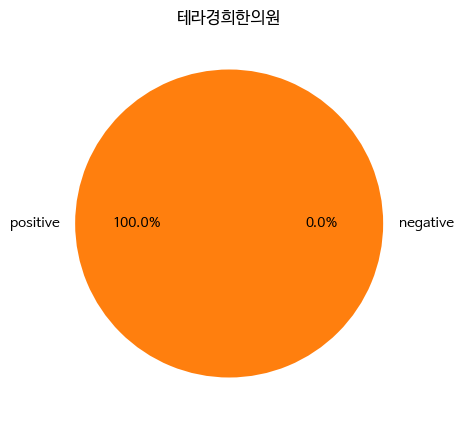

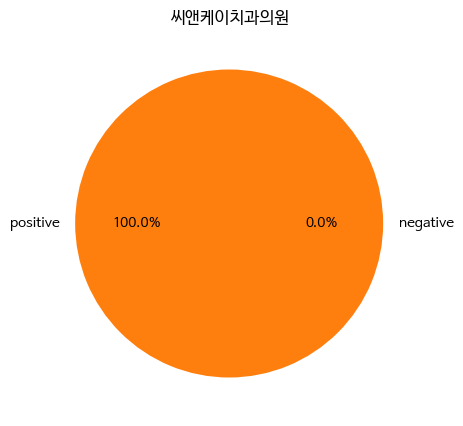

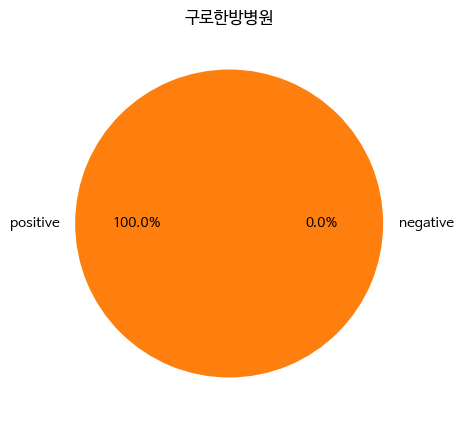

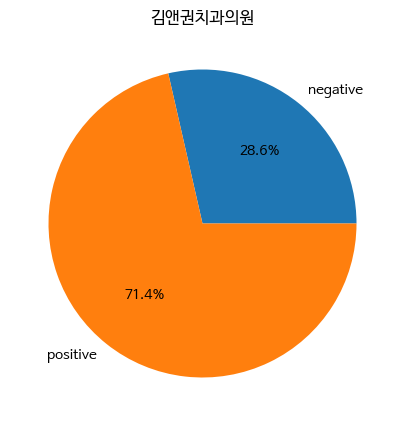

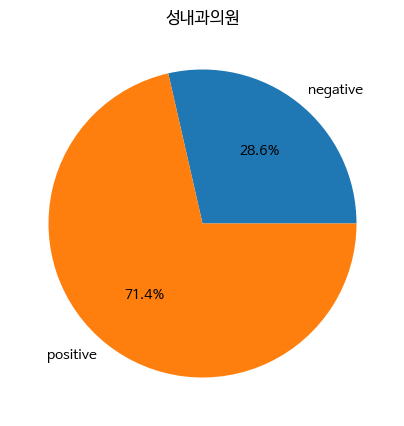

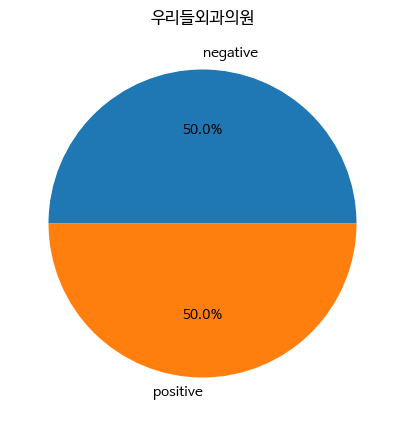

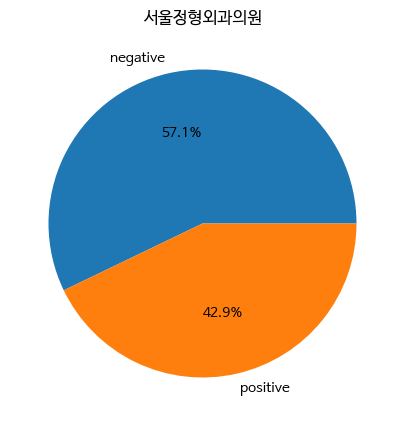

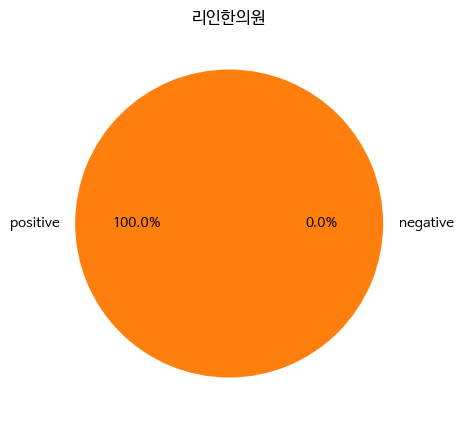

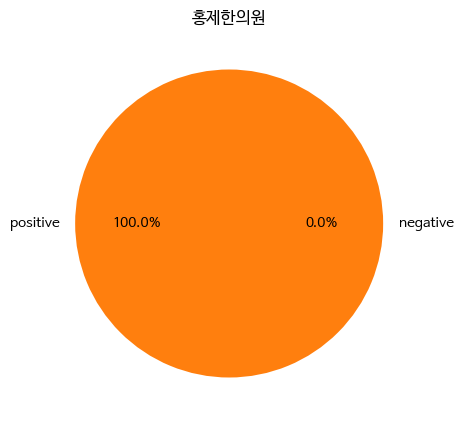

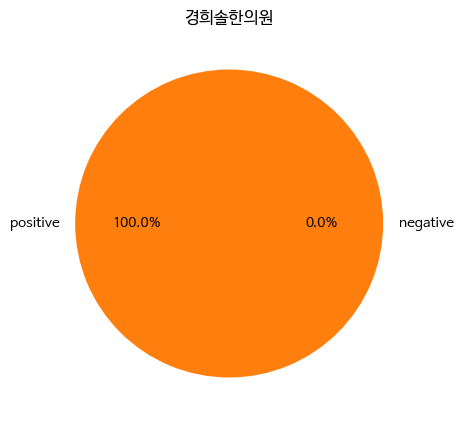

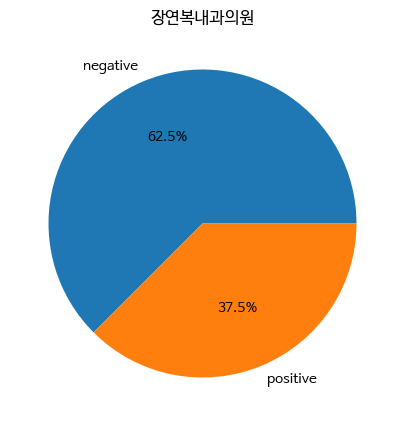

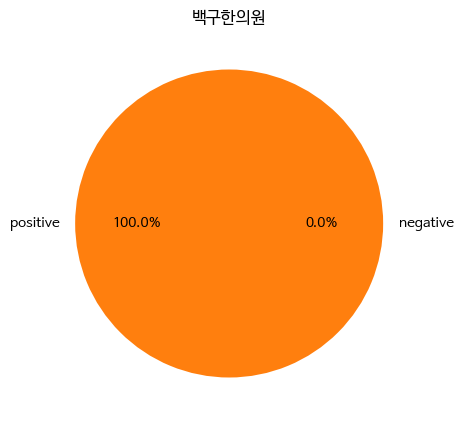

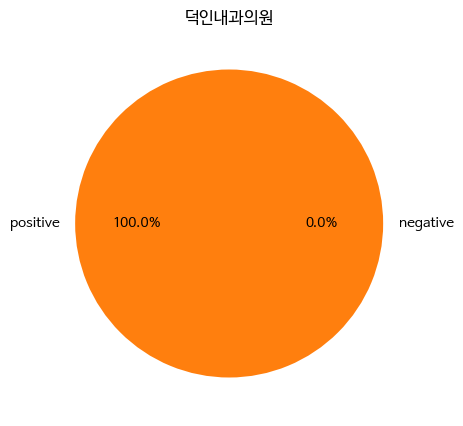

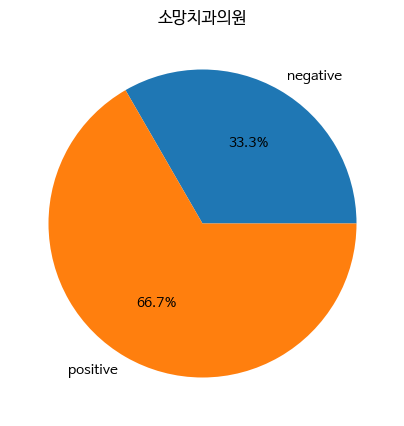

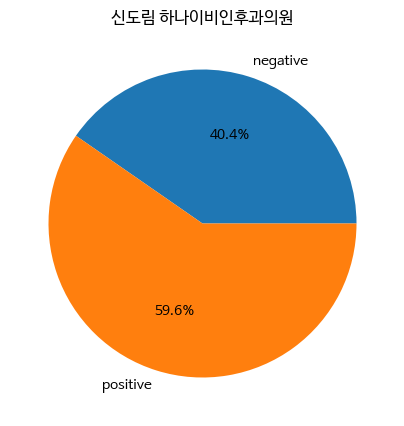

In [75]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

# 각 병원별로 파이 차트 그리기
for index, row in df_hpp.iterrows():
    labels = ['negative', 'positive']
    sizes = [row['negative'], row['positive']]
    plt.figure(figsize=(5,5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(row['hospital_name'])
    
    # 차트 저장: 파일 명에 병원 이름을 포함하여 각 차트를 구분
    # 파일명에서 불가능한 문자를 '_'로 대체
    base_path = "img/hospital_reviews"
    safe_hospital_name = row['hospital_name'].replace('/', '_').replace('\\', '_')
    filename = f"{base_path}/{safe_hospital_name}.png"

    os.makedirs(base_path, exist_ok=True)
    
    plt.savefig(filename, dpi=300)  # 파일 저장
    plt.show()
    plt.close()  # 파일 저장 후 차트 닫기